# Analysis of Diabetes Progession: CS675 Intro to Data Science Project #1

Andrew Napurano - AN47692N


The Goal of this project is to perform Exploratory Data Analysis on the diabetes progression dataset and prepare it for machine learning modeling. We will start by analyzing the raw dataset, cleaning it, visualizing it, and understanding the most important features in gathering insight about the target variable which is disease progression.  Descriptive and Inferential Statistics will be run to understand the drivers within features that segment the target variable from different groups within the dataset.

# Libraries for Data Manipulation and Machine Learning

In [1]:
#Data Manipulation Libraries
import pandas as pd
import numpy as np

#warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patheffects as path_effects
sns.set_palette("Set2")

#Statistics Libraries
import scipy.stats as stats
import scipy as sp
from scipy.stats import norm
import statsmodels.api as sm
import random
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statistics import mean, stdev
from scipy.stats import ttest_ind
from math import sqrt

#Machine Learning Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Maching Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

#Hyperparameter Tuning/Scoring
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_absolute_error,mean_squared_error


# Step 1: Data Retrieval, Data Schema, and Missing Values

The diabetes dataset contains measurements taken from 442 diabetic patients all features are numberic type and there are no missing datapoints.  

<b>10 baseline variables (features):</b>

-  age - age in years
-  sex - male or female
-  bmi - body mass index
-  bp - average blood pressure
-  s1 - TC: total serum cholesterol
-  s2 - LDL: low-density lipoproteins
-  s3 - HDL: high-density lipoproteins
-  s4 - TCH: total cholesterol / HDL
-  s5 - LTG: possibly log of serum triglycerides level
-  s6 - GLU: blood sugar level


In [2]:
#read dataframe
url = "https://hastie.su.domains/Papers/LARS/diabetes.data"
# Define the column namescol_names = ["Age","Sex","BMI","BP","S1","S2","S3","S4","S5","S6","Y"]
df = pd.read_csv(url, sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [3]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [4]:
df.isnull().sum()

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

In [5]:
#function to count and plot missing values

def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

percent_nan = percent_missing(df)

#sns.barplot(x=percent_nan.index,y=percent_nan)
#plt.xticks(rotation=90);

In [6]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


 # Step 2: Exploratory Data Analysis
 

In [7]:
def ind_disease(col):
    if col <140:
        return "Lower Progression"
    else:
        return "Higher Progression"
    
df['ind_disease'] = np.vectorize(ind_disease)(df['Y'])

In [8]:
df['ind_disease'].value_counts()

Higher Progression    223
Lower Progression     219
Name: ind_disease, dtype: int64

In [9]:
def gender(col):
    if col == 1:
        return 'Male'
    else:
        return 'Female'
    
df['Gender'] = np.vectorize(gender)(df['SEX'])

In [10]:
df['Gender'].value_counts()

Male      235
Female    207
Name: Gender, dtype: int64

# Our population is balanced between Males 53.2% (235) and Females 46.8% (207)

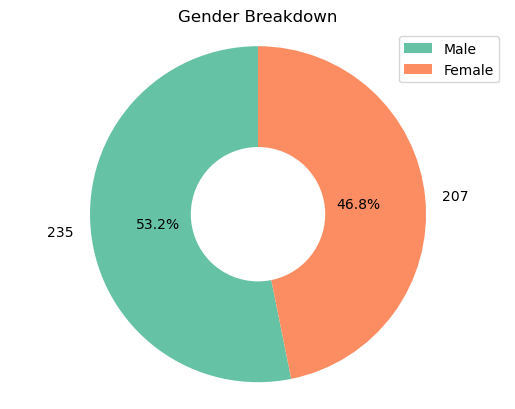

In [11]:
fig, ax = plt.subplots()
d = df["Gender"].value_counts()
ax.pie(d,autopct='%1.1f%%', startangle=90,labels=d.values)
ax.legend(d.index)
ax.set_title("Gender Breakdown")
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal');

# Two Sample T-Test: No Statistical difference observed in average Disease Progression between Males and Females

- H₀ — There is no difference in the means of disease progression between Males and Females
- H₁ — There is a difference in the means of disease progression between Males and Females

 P > 0.05 so we can cannot reject the null hypothesis.  Men have an average of 149 vs Women of 155 in average disease progression.  The Cohens D statistic helped confirm that there was no large difference between the means

Ttest_indResult(statistic=-0.9022224453390377, pvalue=0.3674449793083975)
-0.08609127002145664


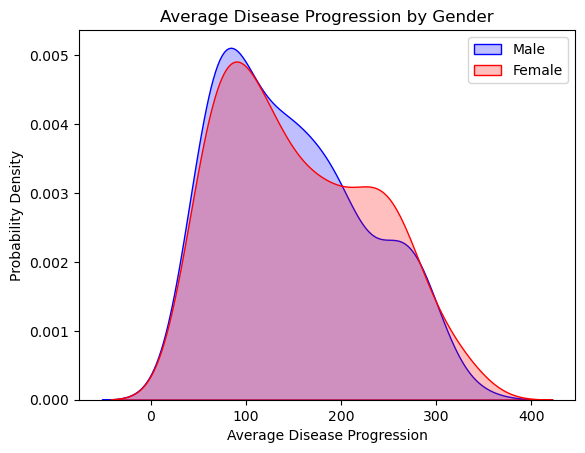

In [12]:
# Two Sample T-Test and Cohens D Statistic to determine if Gender has an effect on diabetes progression
sns.kdeplot(df.loc[(df['SEX']==1),'Y'], color='b', fill=True, label='Male')
 
sns.kdeplot(df.loc[(df['SEX']==2),'Y'], color='r', fill=True, label='Female')
 
plt.xlabel('Average Disease Progression')
plt.ylabel('Probability Density')
plt.title('Average Disease Progression by Gender')
plt.legend()


group1 = df[df['SEX']==1]
group2 = df[df['SEX']==2]

print(ttest_ind(group1['Y'], group2['Y'], equal_var = False))

# test conditions
c0 = df[df['SEX']==1]['Y']
c1 = df[df['SEX']==2]['Y']

cohens_d = (mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2))

print(cohens_d)

In [13]:
stats.bartlett(c0,c1)

BartlettResult(statistic=0.23851331804736278, pvalue=0.6252819426901395)

In [17]:
stats.levene(c0,c1)

LeveneResult(statistic=0.6426270709091354, pvalue=0.4231938007723455)

In [269]:
df.groupby('Gender').Y.mean()

Gender
Female    155.666667
Male      149.021277
Name: Y, dtype: float64

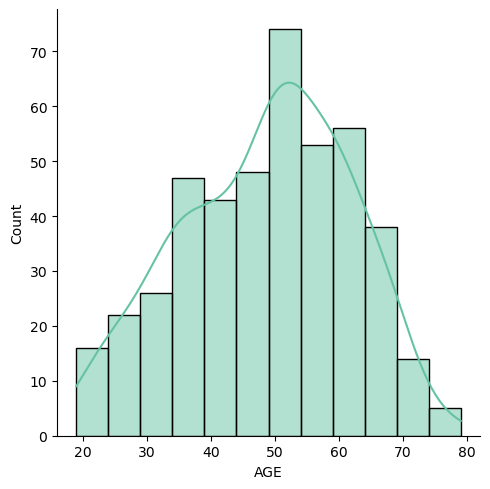

In [270]:
sns.displot(data=df,x='AGE',kde=True)

In [271]:
df['Age_Band'] = pd.cut(df['AGE'], [18, 35, 50,65,99], labels=['18-35', '35-50', '50-65','65+'])

# Our Population is skewed towards older Persons ages 35+, who make up 71% (321) of our Dataset

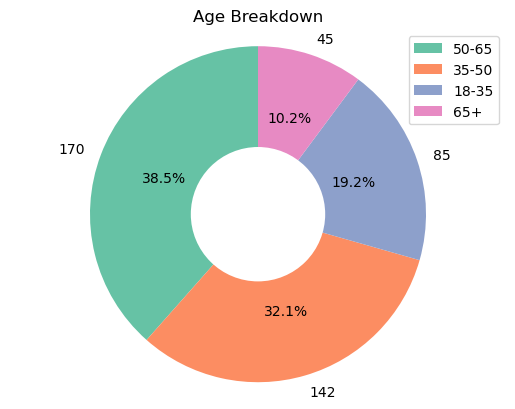

In [272]:
fig, ax = plt.subplots()
d = df["Age_Band"].value_counts()
ax.pie(d,autopct='%1.1f%%', startangle=90,labels=d.values)
ax.legend(d.index)
ax.set_title("Age Breakdown")
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal');

In [273]:
#function to count and plot missing values

#def percent_missing(df):
    #percent_nan = 100* df.isnull().sum() / len(df)
    #percent_nan = percent_nan[percent_nan>0].sort_values()
    #return percent_nan

#percent_nan = percent_missing(df)

#sns.barplot(x=percent_nan.index,y=percent_nan)
#plt.xticks(rotation=90);

In [274]:
#boxplot with median labels

plt.figure(figsize=(12,6))

#stackoverflow reference https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value

def add_median_labels(ax: plt.Axes, fmt: str = ".1f") -> None:
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if "Patch" in str(c)]
    start = 4
    if not boxes:  # seaborn v0.13 => fill=False => no patches => +1 line
        boxes = [c for c in ax.get_lines() if len(c.get_xdata()) == 5]
        start += 1
    lines_per_box = len(lines) // len(boxes)
    for median in lines[start::lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if len(set(median.get_xdata())) == 1 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

<Figure size 1200x600 with 0 Axes>

In [275]:
# Function to call out percentage representation of categorical binning
def count_percent_plot(df, col, hue):

    plt.figure(figsize=(14, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index)
    plt.title(f"Persons by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
   

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df[hue] == 'Higher Progression'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index)
    plt.title(f"Higher Progression by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

# The top 4 features: BMI, Serum Triglycerides Level, Blood Pressure, and Total Serum Cholesterol to HDL ratio have a 0.4+ correlation to our target variable indicating a possitive linear relationship

In [276]:
df.corr()['Y'].sort_values(ascending = False)

Y      1.000000
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
S3    -0.394789
Name: Y, dtype: float64

<Axes: title={'center': 'Correlation Matrix to Dataset Features'}>

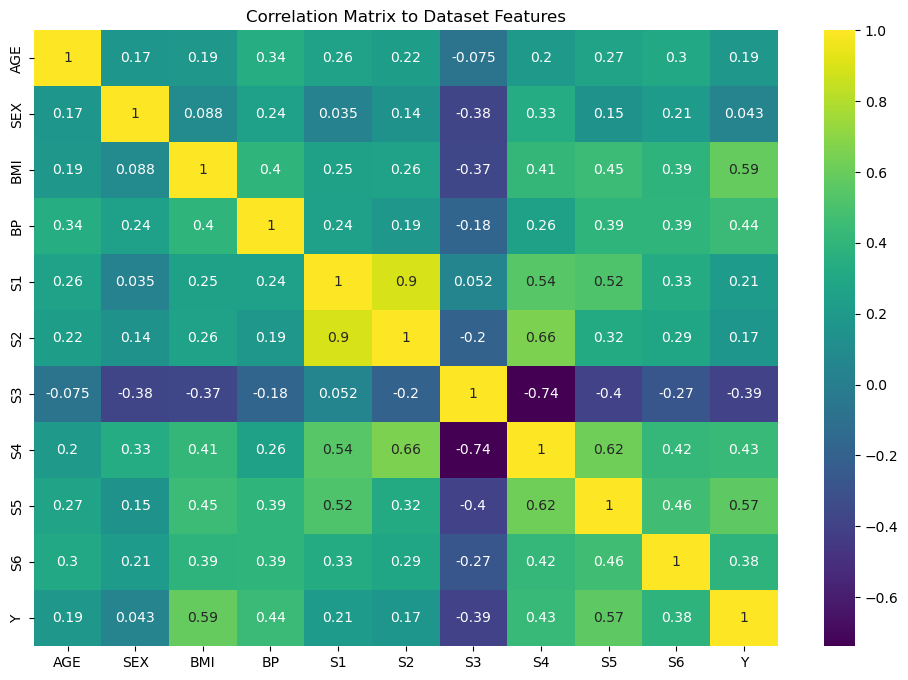

In [277]:
plt.figure(figsize=(12,8))
plt.title('Correlation Matrix to Dataset Features')
sns.heatmap(df.corr(),cmap='viridis',annot=True)

# A positive linear relationship identified between BMI and Disease Progression with an R-Squared value of 0.59

Text(29.000000000000007, 0.5, 'Disease Progression')

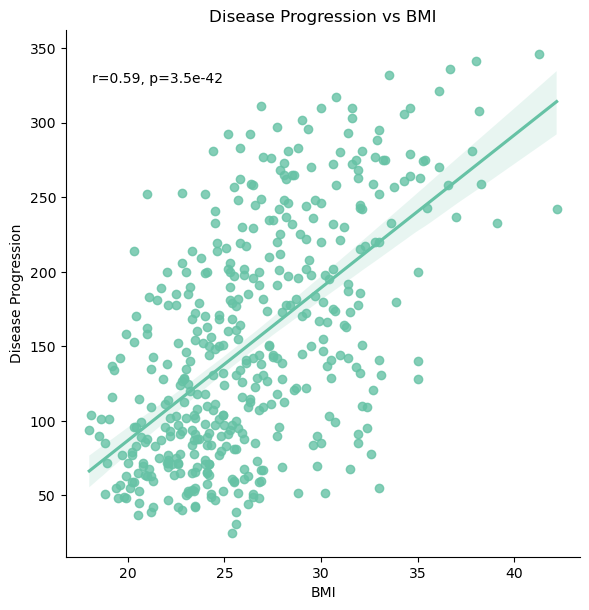

In [278]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['BMI'], data['Y'])
    ax = plt.gca()
    ax.text(.05, 0.9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
g = sns.lmplot(x='BMI', y='Y', data=df, height=6, aspect=1)
g.map_dataframe(annotate)
plt.title('Disease Progression vs BMI')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')

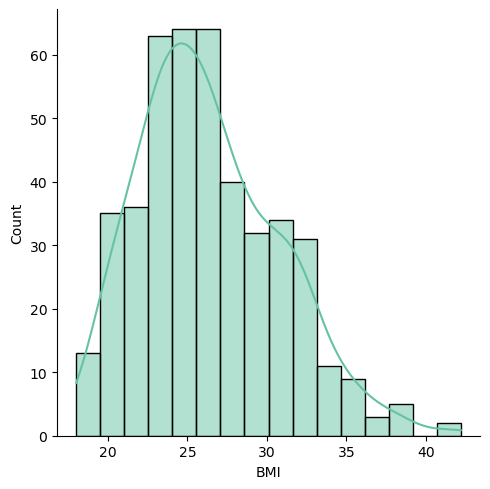

In [279]:
sns.displot(data=df,x='BMI',kde=True)

In [280]:
def bmi(col):
    if col <25:
        return '<25'
    elif col < 30:
        return '25-30'
    else:
        return '30+'
    
df['bmi_band'] = np.vectorize(bmi)(df['BMI'])

In [281]:
df.bmi_band.value_counts()

<25      188
25-30    155
30+       99
Name: bmi_band, dtype: int64

# Increasing median Disease Progression in higher BMI bins observed on Box Plot with BMI of 30+ at highest risk

<b>BMI Population Statistics:</b>

 - <25: Median Disease Progression of 95, 42.5% of our population with 26.6% of them above 140 in DP
 - 25-30: Median Disease Progression of 168, 35.1% of our population with 60% of them above 140 in DP
 - 30+: Median Disease Progression of 230, 22.4% of our population with 80.8% of them above 140 in DP


# ANOVA: Statistical difference observed in average Disease Progression between BMI Bins

- H₀ — There is no difference in the means of disease progression between BMI Groups
- H₁ — There is a difference in the means of disease progression between BMI Groups

 P < 0.05 so we can reject the null hypothesis.  There is a statistical difference between groups and the Post-Hoc Test allowed us to identify the differences where each group was statistically different from eachother

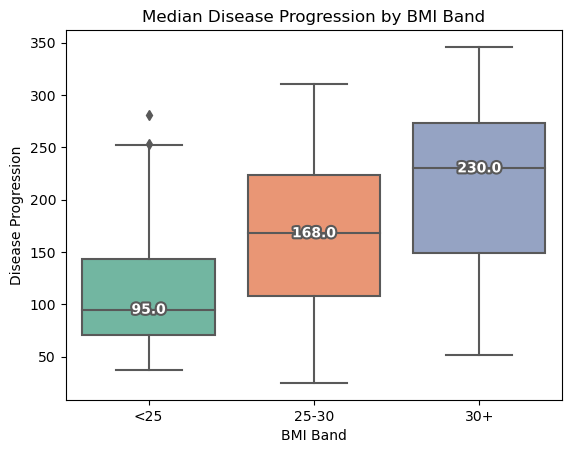

In [282]:
ax = sns.boxplot(x='bmi_band',y='Y',data = df,order=["<25", "25-30", "30+"])
add_median_labels(ax)
plt.title('Median Disease Progression by BMI Band')
plt.xlabel('BMI Band')
plt.ylabel('Disease Progression')
plt.show()

In [283]:
low_bmi = df.loc[df.bmi_band == '<25']['Y']
med_bmi = df.loc[df.bmi_band == '25-30']['Y']
high_bmi = df.loc[df.bmi_band == '30+']['Y']

anova = stats.f_oneway(low_bmi,med_bmi,high_bmi)

result = pairwise_tukeyhsd(endog = df['Y'], groups = df['bmi_band'], alpha = 0.05)
print(result)
print(anova)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2  meandiff p-adj  lower    upper   reject
------------------------------------------------------
 25-30    30+   48.3112   0.0  28.5176  68.1048   True
 25-30    <25  -55.7663   0.0 -72.4577 -39.0749   True
   30+    <25 -104.0775   0.0 -123.182  -84.973   True
------------------------------------------------------
F_onewayResult(statistic=86.7076701200222, pvalue=1.8380269295464046e-32)


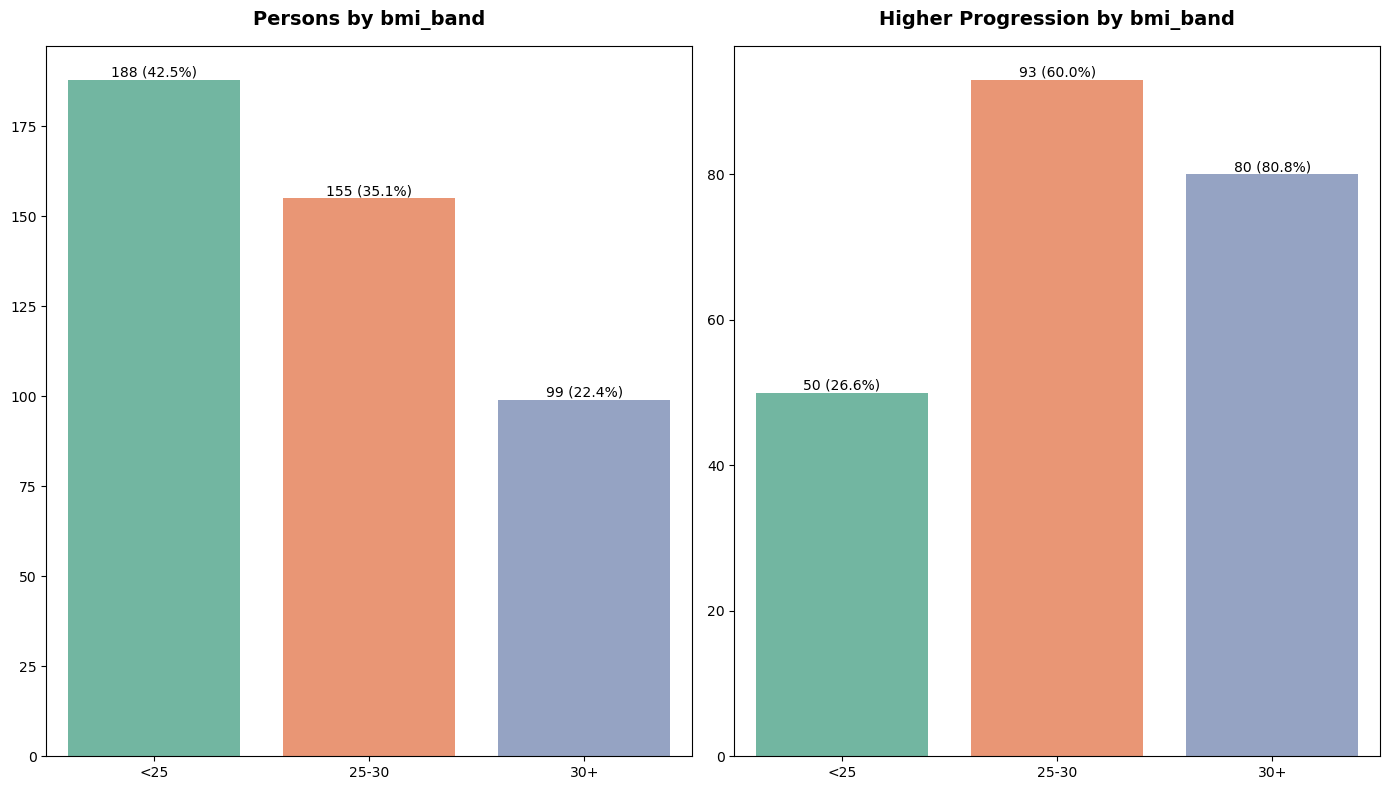

In [284]:
count_percent_plot(df, 'bmi_band', 'ind_disease')

# A positive linear relationship identified between Blood Pressure and Disease Progression with an R-Squared value of 0.44

Text(29.000000000000007, 0.5, 'Disease Progression')

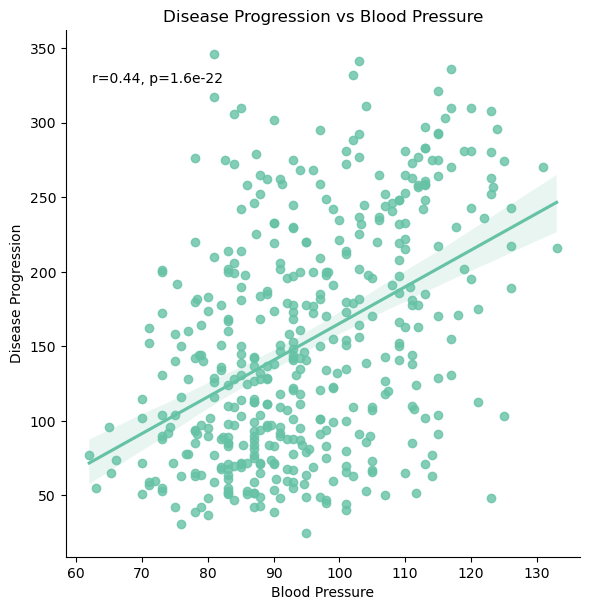

In [285]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['BP'], data['Y'])
    ax = plt.gca()
    ax.text(.05, 0.9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
g = sns.lmplot(x='BP', y='Y', data=df, height=6, aspect=1)
g.map_dataframe(annotate)
plt.title('Disease Progression vs Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Disease Progression')

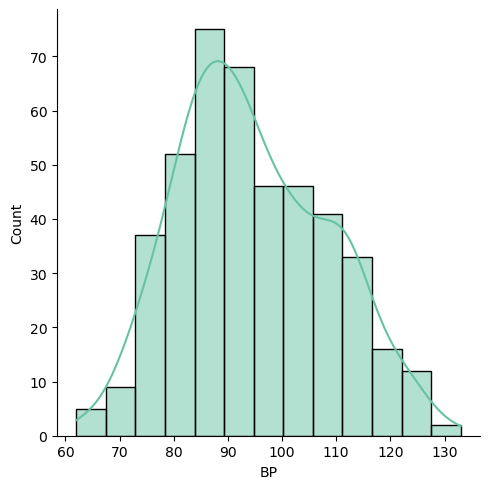

In [286]:
sns.displot(data=df,x='BP',kde=True)

In [287]:
def bp(col):
    if col <85:
        return '<85'
    elif col < 100:
        return '85-100'
    else:
        return '100+'
    
df['bp_band'] = np.vectorize(bp)(df['BP'])

In [288]:
df.bp_band.value_counts()

85-100    178
100+      152
<85       112
Name: bp_band, dtype: int64

# Increasing median Disease Progression in higher Blood Pressure bins observed on Box Plot with BP of 100+ at highest risk

<b>Blood Pressure Population Statistics:</b>

 - <85: Median Disease Progression of 97, 25.3% of our population with 33% of them above 140 in DP
 - 85-100: Median Disease Progression of 126, 40.3% of our population with 42.1% of them above 140 in DP
 - 100+: Median Disease Progression of 205, 34.4% of our population with 73% of them above 140 in DP

# ANOVA: Statistical difference observed in average Disease Progression between BMI Bins

- H₀ — There is no difference in the means of disease progression between BP Groups
- H₁ — There is a difference in the means of disease progression between BP Groups

P < 0.05 so we can reject the null hypothesis.  There is a statistical difference between groups and the Post-Hoc Test allowed us to identify the differences
-  There was no statistical difference between the means of the <85 and 85-100 segment


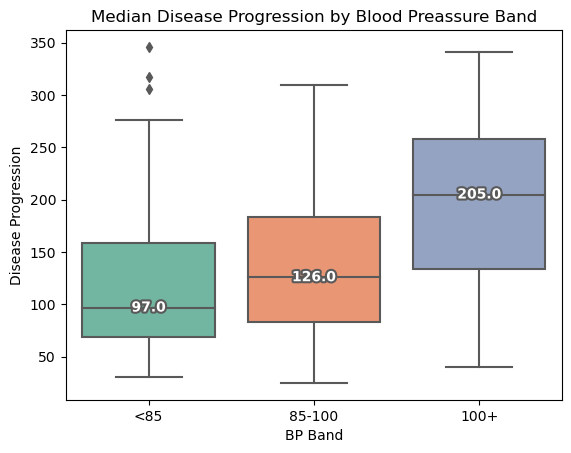

In [289]:
ax = sns.boxplot(x='bp_band',y='Y',data = df,order=["<85", "85-100","100+"])
add_median_labels(ax)
plt.title('Median Disease Progression by Blood Preassure Band')
plt.xlabel('BP Band')
plt.ylabel('Disease Progression')
plt.show()

In [290]:
low_bp = df.loc[df.bp_band == '<85']['Y']
med_bp = df.loc[df.bp_band == '85-100']['Y']
high_bp = df.loc[df.bp_band == '100+']['Y']

anova = stats.f_oneway(low_bp,med_bp,high_bp)

result = pairwise_tukeyhsd(endog = df['Y'], groups = df['bp_band'], alpha = 0.05)
print(result)
print(anova)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  100+ 85-100 -58.4812    0.0 -76.7583 -40.2041   True
  100+    <85 -76.1743    0.0 -96.7832 -55.5655   True
85-100    <85 -17.6931 0.0942 -37.6532    2.267  False
------------------------------------------------------
F_onewayResult(statistic=45.12667695685298, pvalue=1.502442481902894e-18)


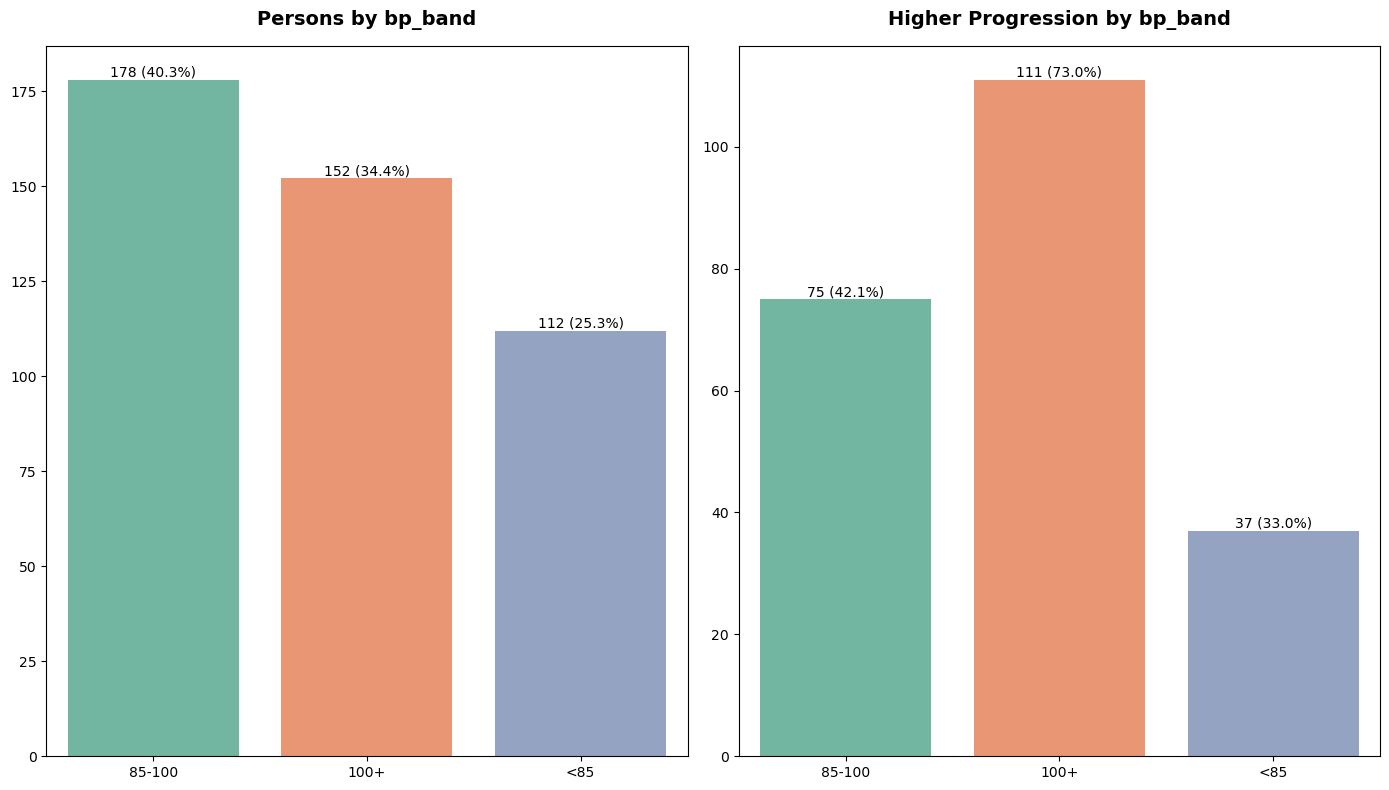

In [291]:
count_percent_plot(df, 'bp_band', 'ind_disease')

# A positive linear relationship identified between Serum Triglycerides Level and Disease Progression with an R-Squared value of 0.57

Text(29.000000000000007, 0.5, 'Disease Progression')

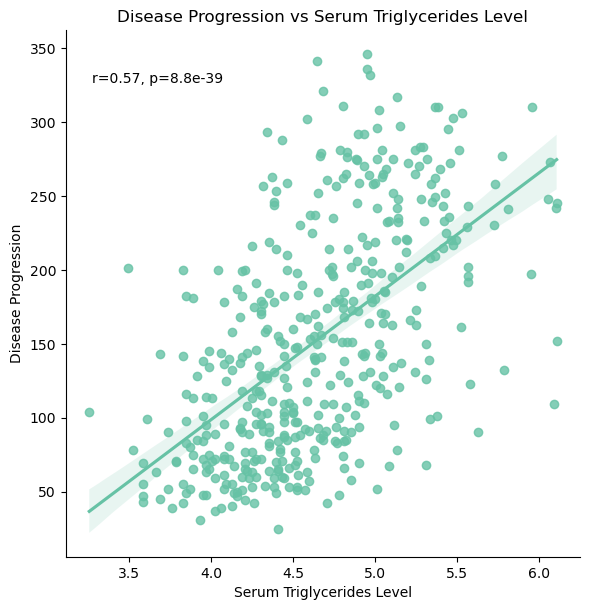

In [292]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['S5'], data['Y'])
    ax = plt.gca()
    ax.text(.05, 0.9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
g = sns.lmplot(x='S5', y='Y', data=df, height=6, aspect=1)
g.map_dataframe(annotate)
plt.title('Disease Progression vs Serum Triglycerides Level')
plt.xlabel('Serum Triglycerides Level')
plt.ylabel('Disease Progression')

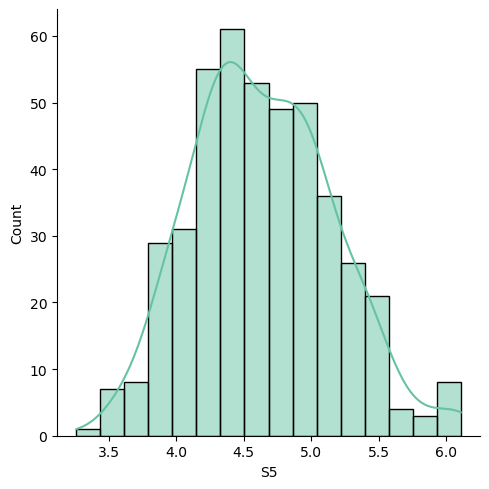

In [293]:
sns.displot(data=df,x='S5',kde=True)

In [294]:
def s5(col):
    if col <4.5:
        return '<4.5'
    elif col < 5:
        return '4.5-5'
    else:
        return '5+'
    
df['s5_band'] = np.vectorize(s5)(df['S5'])

In [295]:
df.s5_band.value_counts()

<4.5     192
4.5-5    141
5+       109
Name: s5_band, dtype: int64

# Increasing median Disease Progression in higher Serum Triglyceride bins observed on Box Plot with ST of 5+ at highest risk

<b>Serum Triglyceride Population Statistics:</b>

 - <4.5: Median Disease Progression of 95.5, 43.4% of our population with 25.5% of them above 140 in DP
 - 4.5-5: Median Disease Progression of 156, 31.9% of our population with 61% of them above 140 in DP
 - 5+: Median Disease Progression of 225, 24.7% of our population with 80.7% of them above 140 in DP

# ANOVA: Statistical difference observed in average Disease Progression between Serum Triglyceride Bins

- H₀ — There is no difference in the means of disease progression between ST Groups
- H₁ — There is a difference in the means of disease progression between ST Groups

P < 0.05 so we can reject the null hypothesis.  There is a statistical difference between groups and the Post-Hoc Test allowed us to identify the differences

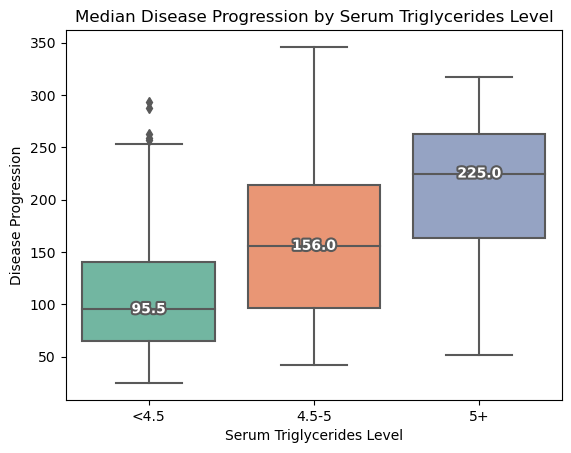

In [296]:
ax = sns.boxplot(x='s5_band',y='Y',data = df,order=["<4.5", "4.5-5","5+"])
add_median_labels(ax)
plt.title('Median Disease Progression by Serum Triglycerides Level')
plt.xlabel('Serum Triglycerides Level')
plt.ylabel('Disease Progression')
plt.show()

In [297]:
low_s5 = df.loc[df.s5_band == '<4.5']['Y']
med_s5 = df.loc[df.s5_band == '4.5-5']['Y']
high_s5 = df.loc[df.s5_band == '5+']['Y']


anova = stats.f_oneway(low_s5,med_s5,high_s5)

result = pairwise_tukeyhsd(endog = df['Y'], groups = df['s5_band'], alpha = 0.05)
print(result)
print(anova)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 4.5-5     5+  45.1173   0.0   25.5899  64.6447   True
 4.5-5   <4.5 -56.8006   0.0  -73.7815 -39.8198   True
    5+   <4.5 -101.918   0.0 -120.2798 -83.5561   True
------------------------------------------------------
F_onewayResult(statistic=89.67420783262556, pvalue=2.21443683491712e-33)


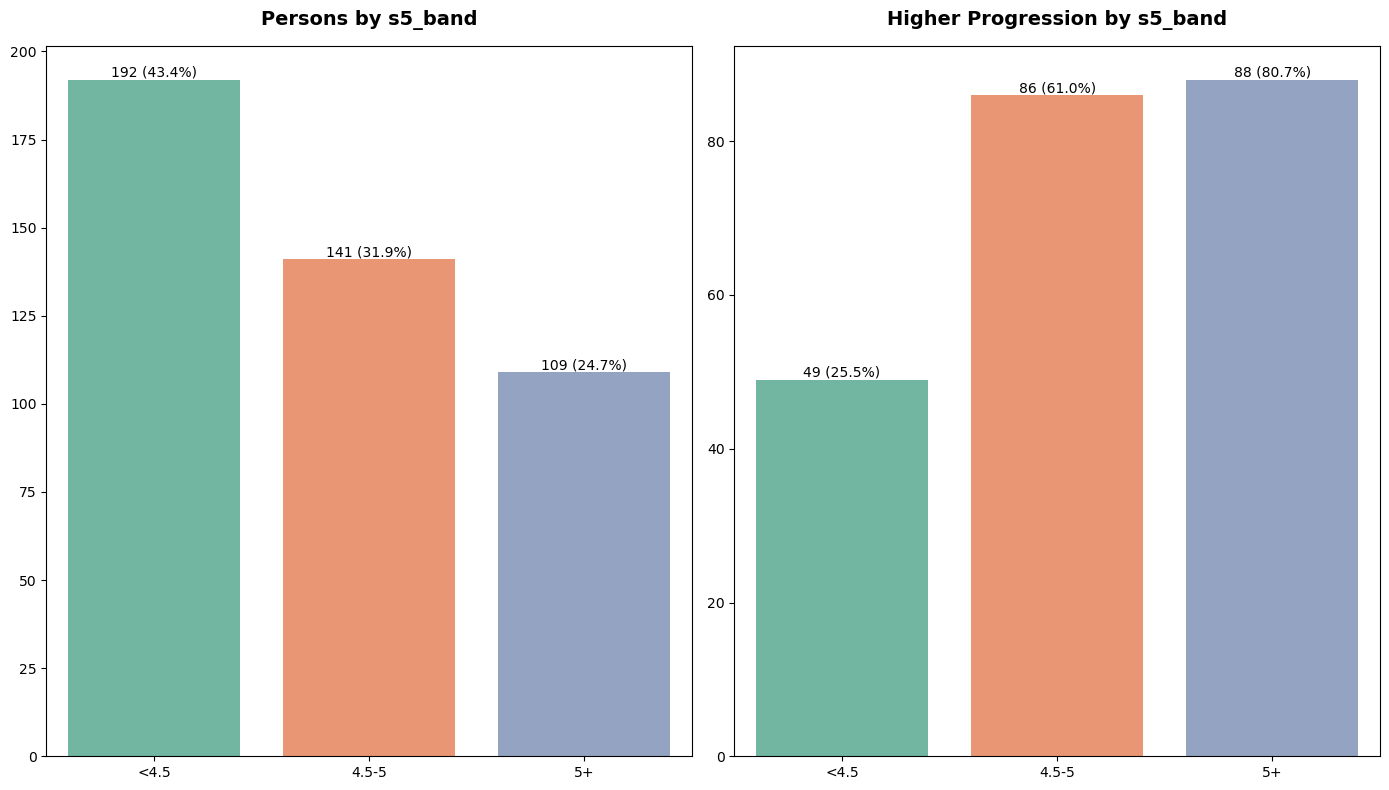

In [298]:
count_percent_plot(df, 's5_band', 'ind_disease')

# A Weak positive linear relationship identified between Serum Cholesterol Level and Disease Progression with an R-Squared value of 0.21

Text(29.000000000000007, 0.5, 'Disease Progression')

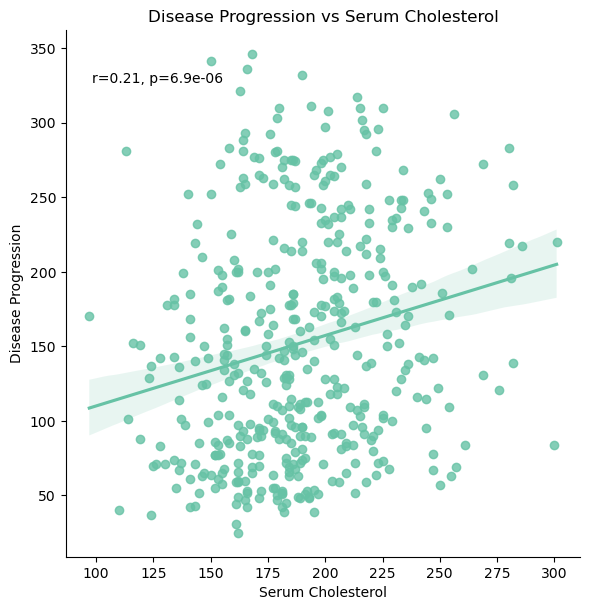

In [299]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['S1'], data['Y'])
    ax = plt.gca()
    ax.text(.05, 0.9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
g = sns.lmplot(x='S1', y='Y', data=df, height=6, aspect=1)
g.map_dataframe(annotate)
plt.title('Disease Progression vs Serum Cholesterol')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Disease Progression')

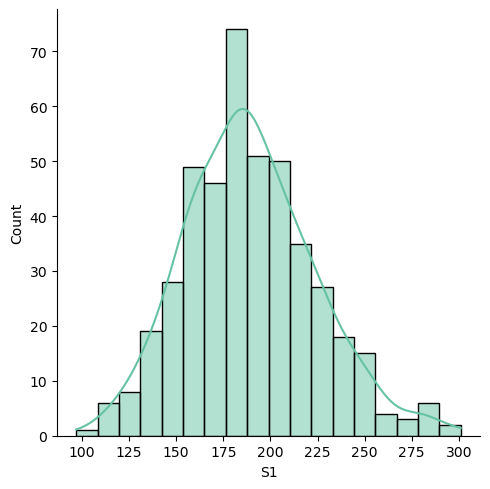

In [300]:
sns.displot(data=df,x='S1',kde=True)

In [301]:
def s1(col):
    if col <175:
        return '<175'
    elif col < 200:
        return '175-200'
    else:
        return '200+'
df['s1_band'] = np.vectorize(s1)(df['S1'])

In [302]:
df['s1_band'].value_counts()

200+       156
<175       151
175-200    135
Name: s1_band, dtype: int64

# Increasing median Disease Progression in higher Serum Cholesterol bins observed on Box Plot with SC of 200+ at highest risk

<b>Serum Cholesterol Population Statistics:</b>

 - <175: Median Disease Progression of 124, 34.2% of our population with 41.1% of them above 140 in DP
 - 175-200: Median Disease Progression of 129, 30.5% of our population with 47.4% of them above 140 in DP
 - 200+: Median Disease Progression of 178, 35.3% of our population with 62.2% of them above 140 in DP

# ANOVA: Statistical difference observed in average Disease Progression between Serum Cholesterol Bins

- H₀ — There is no difference in the means of disease progression between SC Groups
- H₁ — There is a difference in the means of disease progression between SC Groups

P < 0.05 so we can reject the null hypothesis.  There is a statistical difference between groups and the Post-Hoc Test allowed us to identify the differences.
-  There was no statistical difference between the means of the <175 and 175-200 segment

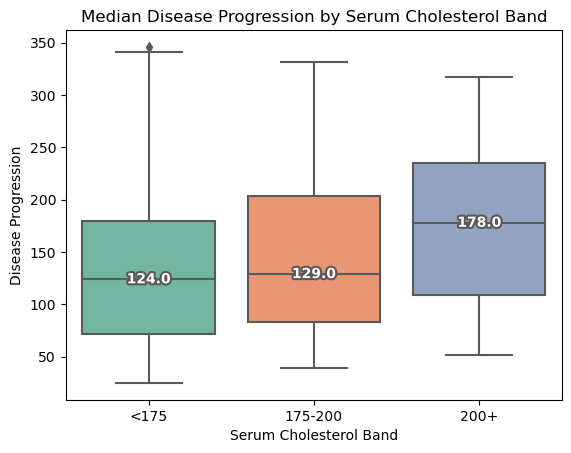

In [303]:
ax = sns.boxplot(x='s1_band',y='Y',data = df,order=["<175", "175-200","200+"])
add_median_labels(ax)
plt.title('Median Disease Progression by Serum Cholesterol Band')
plt.xlabel('Serum Cholesterol Band')
plt.ylabel('Disease Progression')
plt.show()

In [304]:
low_s1 = df.loc[df.s1_band == '<175']['Y']
med_s1 = df.loc[df.s1_band == '175-200']['Y']
high_s1 = df.loc[df.s1_band == '200+']['Y']

anova = stats.f_oneway(low_s1,med_s1,high_s1)

result = pairwise_tukeyhsd(endog = df['Y'], groups = df['s1_band'], alpha = 0.05)
print(result)
print(anova)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj   lower    upper   reject
-------------------------------------------------------
175-200   200+  28.1483 0.0045   7.3343  48.9623   True
175-200   <175 -12.3626  0.349 -33.3359   8.6106  False
   200+   <175 -40.5109    0.0 -60.7251 -20.2967   True
-------------------------------------------------------
F_onewayResult(statistic=11.665249632914678, pvalue=1.158453887680272e-05)


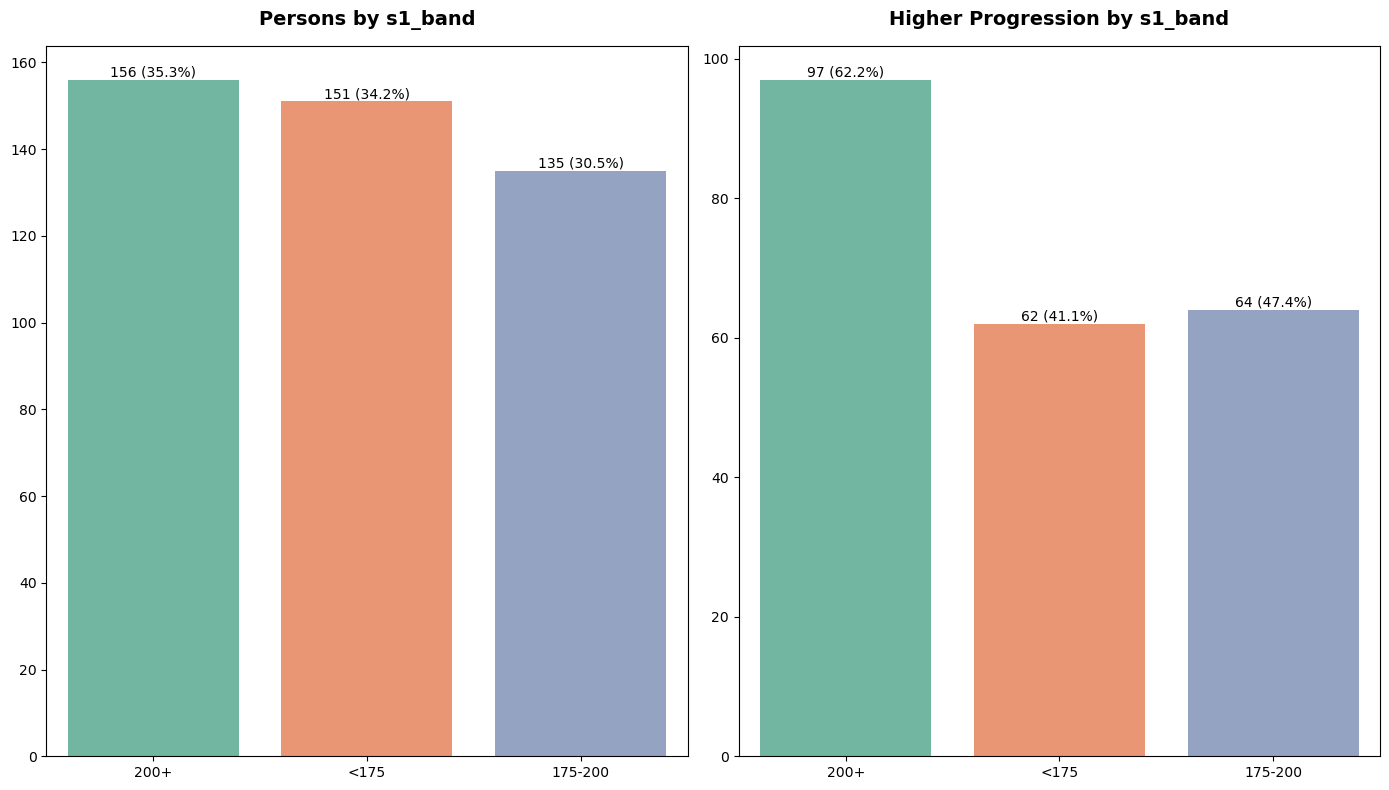

In [305]:
count_percent_plot(df, 's1_band', 'ind_disease')

# A Weak positive linear relationship identified between Low Density Lipoproteins  and Disease Progression with an R-Squared value of 0.17

Text(29.000000000000007, 0.5, 'Disease Progression')

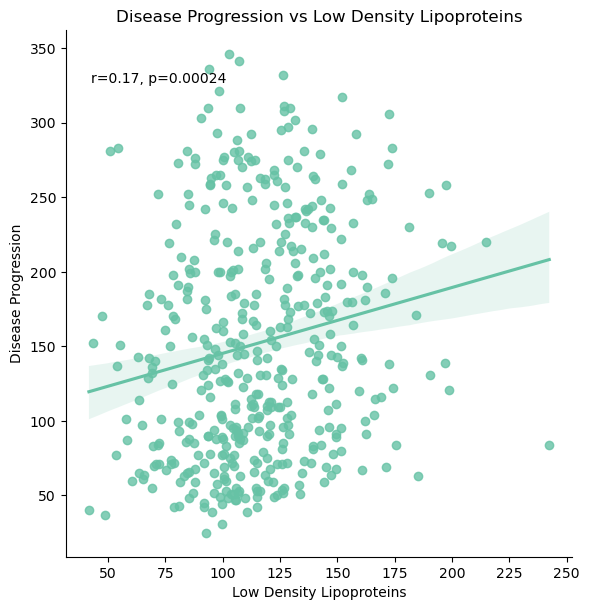

In [306]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['S2'], data['Y'])
    ax = plt.gca()
    ax.text(.05, 0.9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
g = sns.lmplot(x='S2', y='Y', data=df, height=6, aspect=1)
g.map_dataframe(annotate)
plt.title('Disease Progression vs Low Density Lipoproteins')
plt.xlabel('Low Density Lipoproteins')
plt.ylabel('Disease Progression')

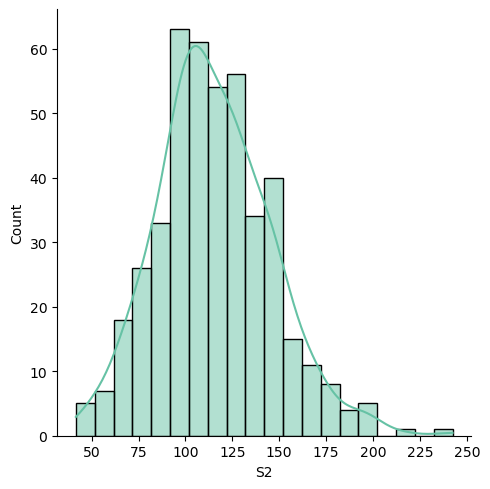

In [307]:
sns.displot(data=df,x='S2',kde=True)

In [308]:
def s2(col):
    if col <100:
        return '<100'
    elif col < 125:
        return '100-125'
    else:
        return '125+'
df['s2_band'] = np.vectorize(s2)(df['S2'])

In [309]:
df['s2_band'].value_counts()

125+       162
100-125    144
<100       136
Name: s2_band, dtype: int64

# Increasing median Disease Progression in higher low Density Lipoprotein bins observed on Box Plot with LDP of 125+ at highest risk

<b>Low Density Lipoprotein Population Statistics:</b>

 - <100: Median Disease Progression of 128, 30.8% of our population with 44.1% of them above 140 in DP
 - 100-125: Median Disease Progression of 118, 32.6% of our population with 43.1% of them above 140 in DP
 - 125+: Median Disease Progression of 173.5, 36.7% of our population with 62.3% of them above 140 in DP

# ANOVA: Statistical difference observed in average Disease Progression between Low Density Lipoprotein Bins

- H₀ — There is no difference in the means of disease progression between LDP Groups
- H₁ — There is a difference in the means of disease progression between LDP Groups

P < 0.05 so we can reject the null hypothesis.  There is a statistical difference between groups and the Post-Hoc Test allowed us to identify the differences.
-  There was no statistical difference between the means of the <100 and 100-125 segment

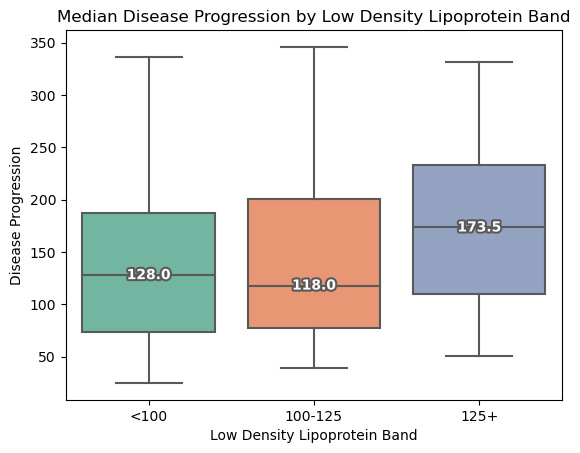

In [310]:
ax = sns.boxplot(x='s2_band',y='Y',data = df,order=["<100", "100-125","125+"])
add_median_labels(ax)
plt.title('Median Disease Progression by Low Density Lipoprotein Band')
plt.xlabel('Low Density Lipoprotein Band')
plt.ylabel('Disease Progression')
plt.show()

In [311]:
low_s2 = df.loc[df.s2_band == '<100']['Y']
med_s2 = df.loc[df.s2_band == '100-125']['Y']
high_s2 = df.loc[df.s2_band == '125+']['Y']

anova = stats.f_oneway(low_s2,med_s2,high_s2)

result = pairwise_tukeyhsd(endog = df['Y'], groups = df['s2_band'], alpha = 0.05)
print(result)
print(anova)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj   lower    upper   reject
-------------------------------------------------------
100-125   125+  29.8997 0.0018   9.5071  50.2922   True
100-125   <100  -3.8105  0.907 -25.1006  17.4796  False
   125+   <100 -33.7101 0.0004 -54.4178 -13.0025   True
-------------------------------------------------------
F_onewayResult(statistic=9.112232581470339, pvalue=0.0001326006331914134)


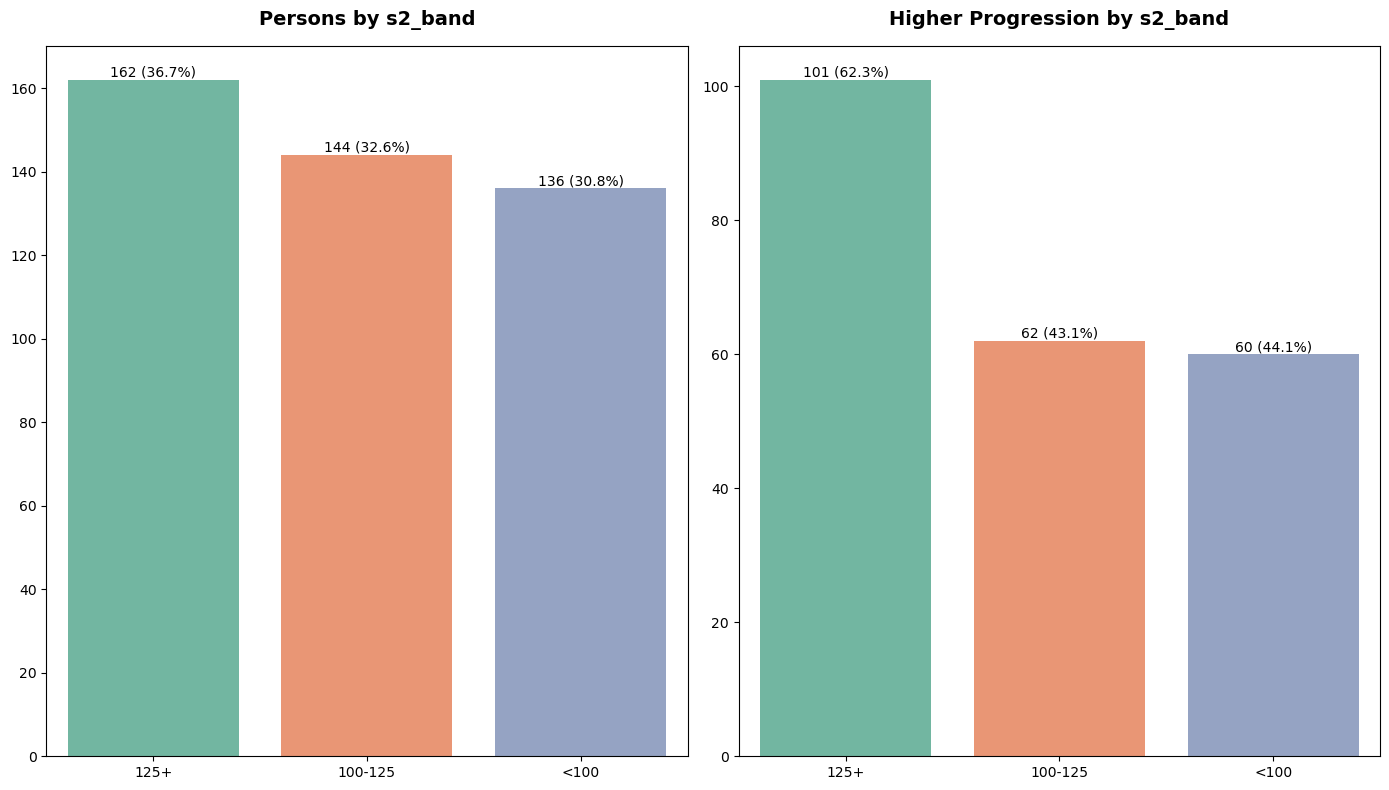

In [312]:
count_percent_plot(df, 's2_band', 'ind_disease')

# A Negative linear relationship identified between High Density Lipoproteins and Disease Progression with an R-Squared value of -0.39

Text(29.000000000000007, 0.5, 'Disease Progression')

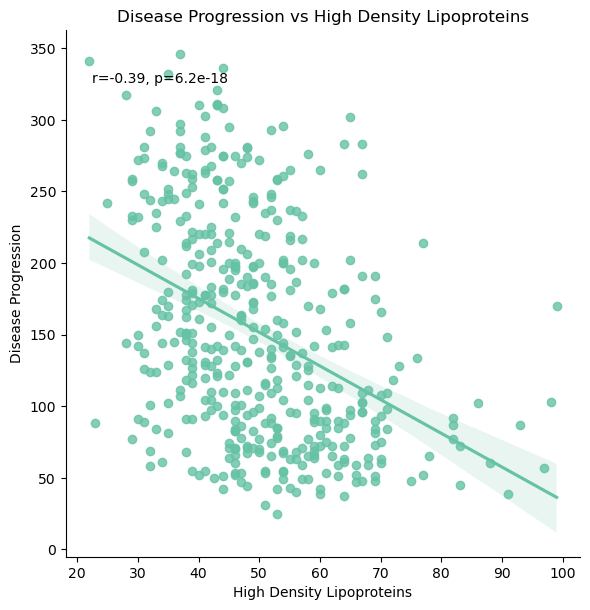

In [313]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['S3'], data['Y'])
    ax = plt.gca()
    ax.text(.05, 0.9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
g = sns.lmplot(x='S3', y='Y', data=df, height=6, aspect=1)
g.map_dataframe(annotate)
plt.title('Disease Progression vs High Density Lipoproteins')
plt.xlabel('High Density Lipoproteins')
plt.ylabel('Disease Progression')

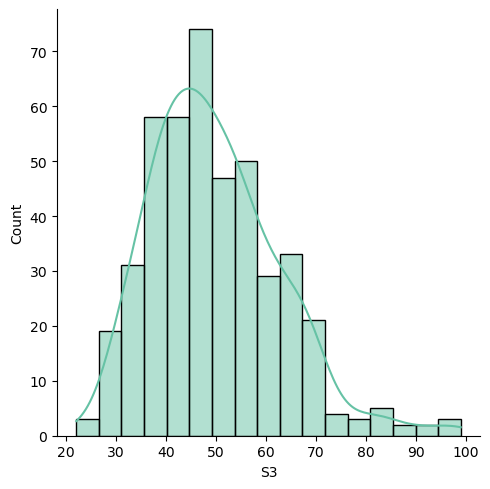

In [314]:
sns.displot(data=df,x='S3',kde=True)

In [315]:
def s3(col):
    if col <50:
        return '<50'
    elif col < 60:
        return '50-60'
    else:
        return '60+'
df['s3_band'] = np.vectorize(s3)(df['S3'])

In [316]:
df['s3_band'].value_counts()

<50      243
50-60    106
60+       93
Name: s3_band, dtype: int64

# Decreasing median Disease Progression in low Density Lipoprotein bins observed on Box Plot with HDP of 60+ at lowest risk

<b>High Density Lipoprotein Population Statistics:</b>

 - <50: Median Disease Progression of 173, 55% of our population with 65% of them above 140 in DP
 - 50-60: Median Disease Progression of 123, 24% of our population with 40.6% of them above 140 in DP
 - 60+: Median Disease Progression of 90, 21% of our population with 23.7% of them above 140 in DP

# ANOVA: Statistical difference observed in average Disease Progression between High Density Lipoprotein Bins

- H₀ — There is no difference in the means of disease progression between HDP Groups
- H₁ — There is a difference in the means of disease progression between HDP Groups

P < 0.05 so we can reject the null hypothesis.  There is a statistical difference between groups and the Post-Hoc Test allowed us to identify the differences.

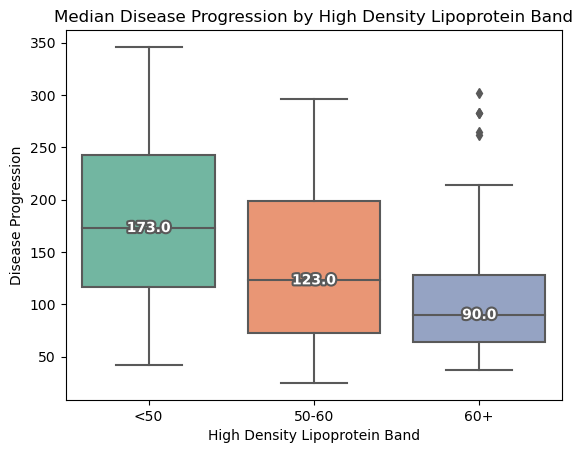

In [317]:
ax = sns.boxplot(x='s3_band',y='Y',data = df,order=["<50", "50-60", "60+"])
add_median_labels(ax)
plt.title('Median Disease Progression by High Density Lipoprotein Band')
plt.xlabel('High Density Lipoprotein Band')
plt.ylabel('Disease Progression')
plt.show()

In [318]:
low_s3 = df.loc[df.s3_band == '<50']['Y']
med_s3 = df.loc[df.s3_band == '50-60']['Y']
high_s3 = df.loc[df.s3_band == '60+']['Y']

anova = stats.f_oneway(low_s3,med_s3,high_s3)

result = pairwise_tukeyhsd(endog = df['Y'], groups = df['s3_band'], alpha = 0.05)
print(result)
print(anova)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
 50-60    60+ -29.1846 0.012 -53.1106 -5.2587   True
 50-60    <50  41.0985   0.0  21.4968 60.7002   True
   60+    <50  70.2832   0.0  49.7497 90.8166   True
----------------------------------------------------
F_onewayResult(statistic=36.07855452585167, pvalue=3.1136532328248315e-15)


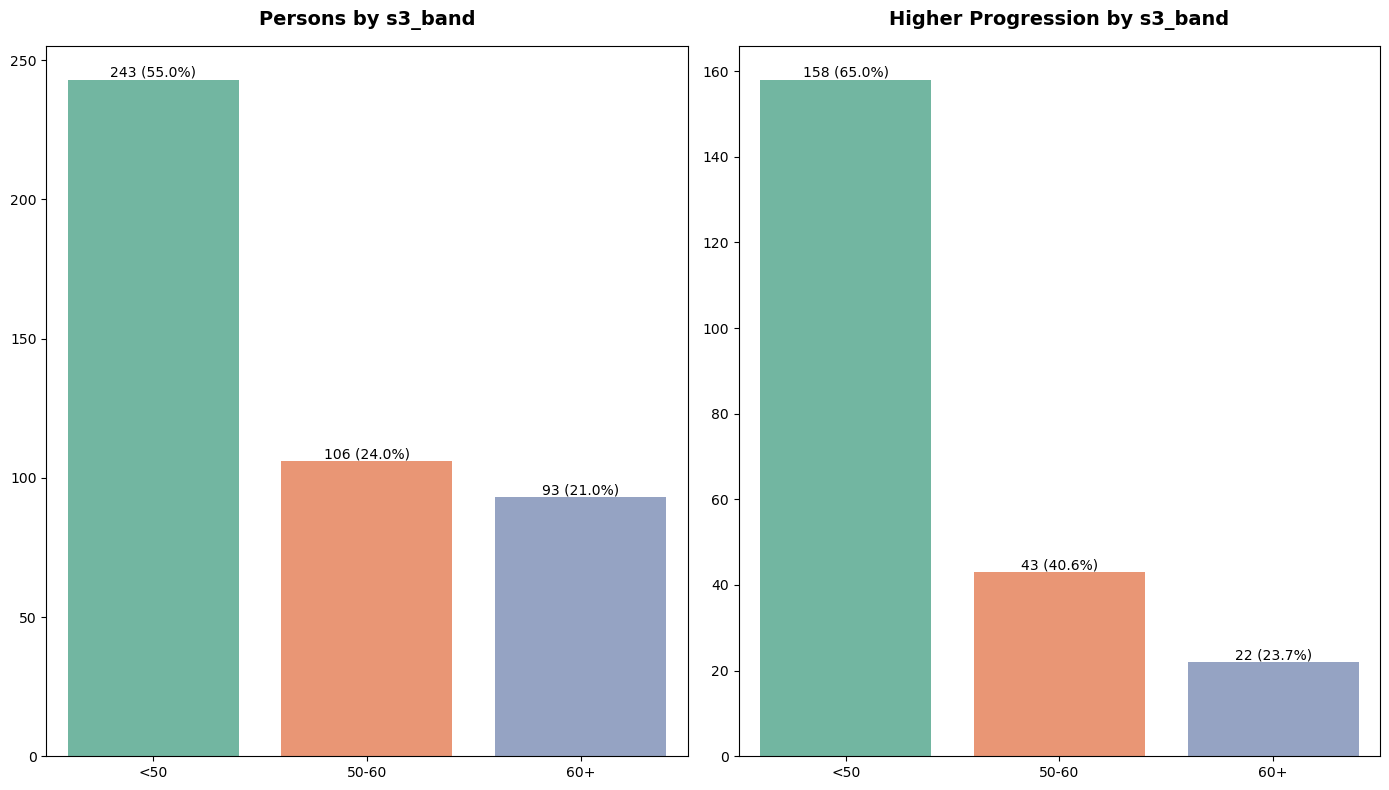

In [319]:
count_percent_plot(df, 's3_band', 'ind_disease')

# A Positive linear relationship identified between Total Cholesterol/HDL Ratio and Disease Progression with an R-Squared value of 0.43

Text(29.000000000000007, 0.5, 'Disease Progression')

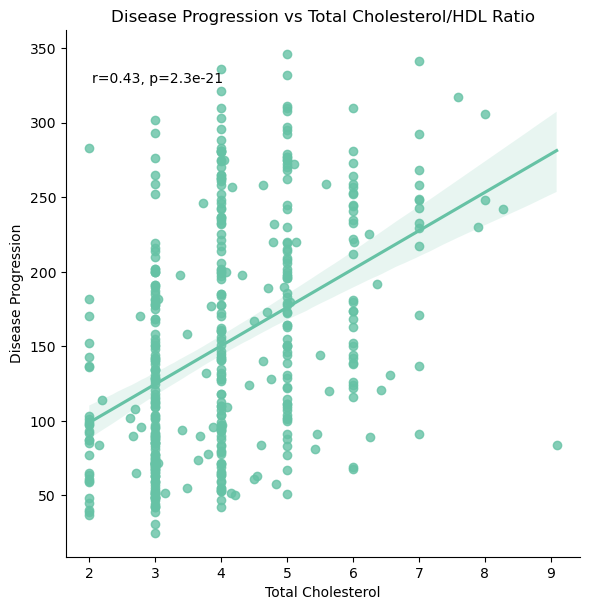

In [320]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['S4'], data['Y'])
    ax = plt.gca()
    ax.text(.05, 0.9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
g = sns.lmplot(x='S4', y='Y', data=df, height=6, aspect=1)
g.map_dataframe(annotate)
plt.title('Disease Progression vs Total Cholesterol/HDL Ratio')
plt.xlabel('Total Cholesterol')
plt.ylabel('Disease Progression')

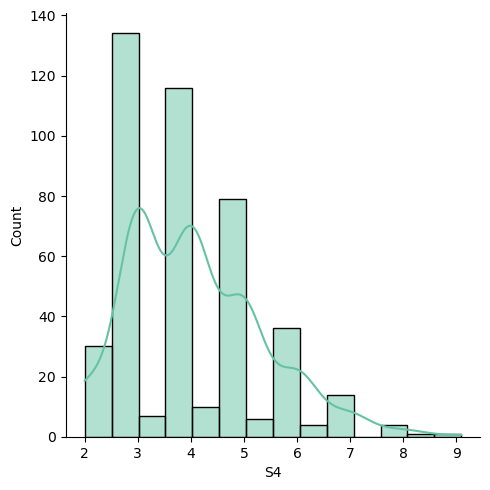

In [321]:
sns.displot(data=df,x='S4',kde=True)

In [322]:
def s4(col):
    if col <4:
        return '<4'
    elif col < 5:
        return '4-5'
    else:
        return '5+'
df['s4_band'] = np.vectorize(s4)(df['S4'])

In [323]:
df['s4_band'].value_counts()

<4     178
5+     134
4-5    130
Name: s4_band, dtype: int64

# Increasing median Disease Progression in low Total Cholesterol/HDL Ratio bins observed on Box Plot with HDP of 5+ at highest risk

<b>Total Cholesterol/HDL Ratio Population Statistics:</b>

 - <4: Median Disease Progression of 95,5, 40.3% of our population with 28.7% of them above 140 in DP
 - 4-5: Median Disease Progression of 158, 29.4% of our population with 57.7% of them above 140 in DP
 - 5+: Median Disease Progression of 196, 30.3% of our population with 72.4% of them above 140 in DP

# ANOVA: Statistical difference observed in average Disease Progression between Total Cholesterol/HDL Ratio Bins

- H₀ — There is no difference in the means of disease progression between TC/HDL Groups
- H₁ — There is a difference in the means of disease progression between TC/HDL Groups

P < 0.05 so we can reject the null hypothesis.  There is a statistical difference between groups and the Post-Hoc Test allowed us to identify the differences.

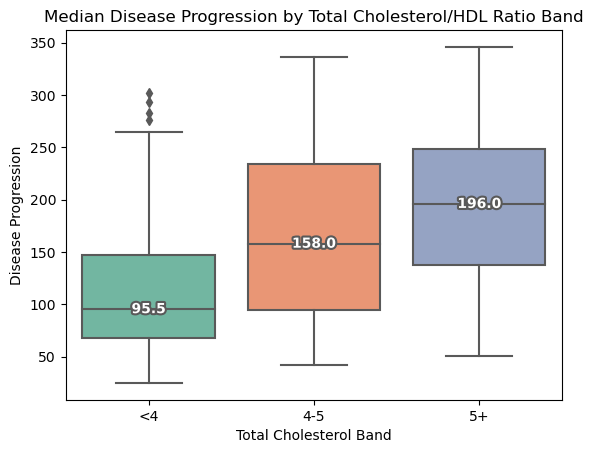

In [324]:
ax = sns.boxplot(x='s4_band',y='Y',data = df,order=["<4", "4-5","5+"])
add_median_labels(ax)
plt.title('Median Disease Progression by Total Cholesterol/HDL Ratio Band')
plt.xlabel('Total Cholesterol Band')
plt.ylabel('Disease Progression')
plt.show()

In [325]:
low_s4 = df.loc[df.s4_band == '<4']['Y']
med_s4 = df.loc[df.s4_band == '4-5']['Y']
high_s4 = df.loc[df.s4_band == '5+']['Y']

anova = stats.f_oneway(low_s4,med_s4,high_s4)

result = pairwise_tukeyhsd(endog = df['Y'], groups = df['s4_band'], alpha = 0.05)
print(result)
print(anova)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   4-5     5+  29.5324 0.0016   9.5396  49.5252   True
   4-5     <4 -51.4884    0.0 -70.2249 -32.7519   True
    5+     <4 -81.0208    0.0  -99.595 -62.4466   True
------------------------------------------------------
F_onewayResult(statistic=55.29444345550617, pvalue=3.8250211324671192e-22)


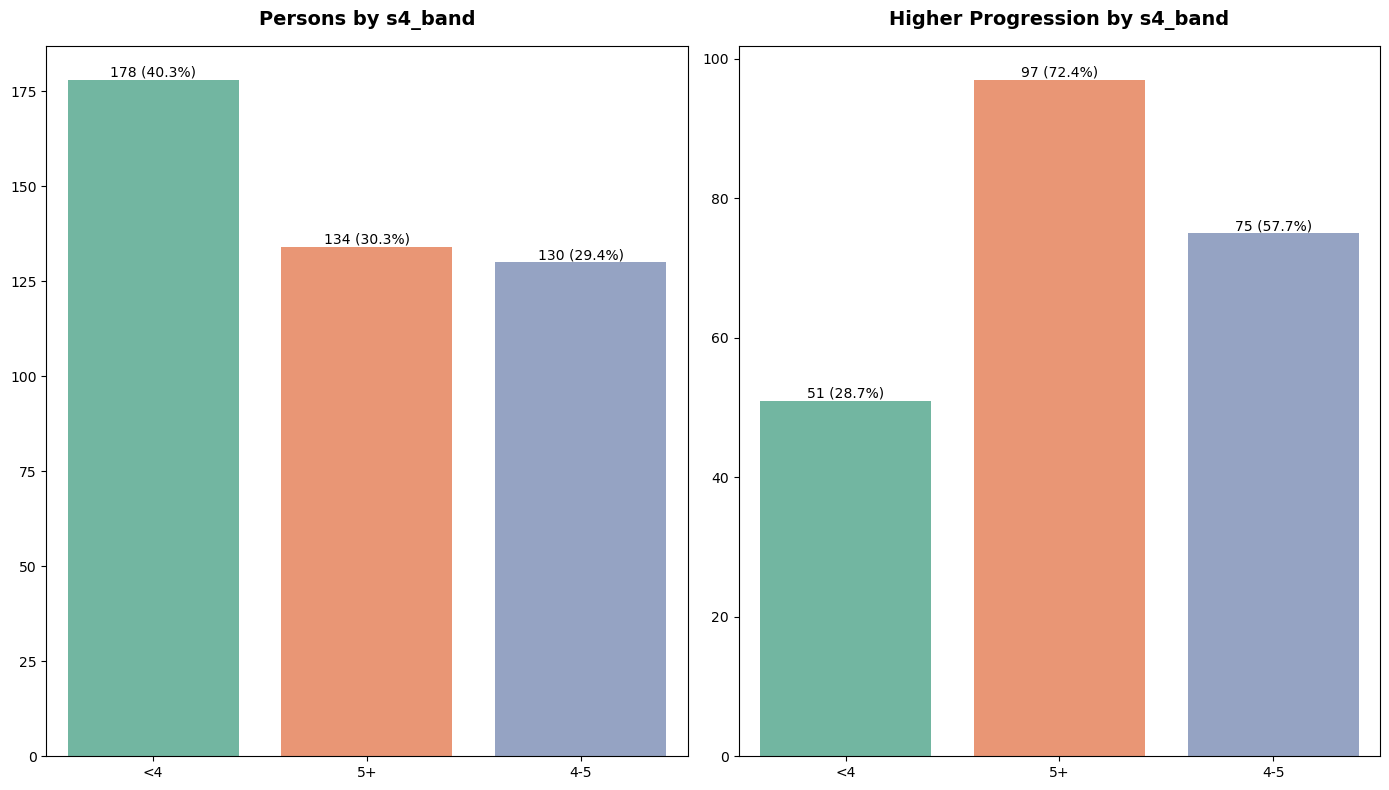

In [326]:
count_percent_plot(df, 's4_band', 'ind_disease')

# A Positive linear relationship identified between Blood Glucose and Disease Progression with an R-Squared value of 0.38

Text(29.000000000000007, 0.5, 'Disease Progression')

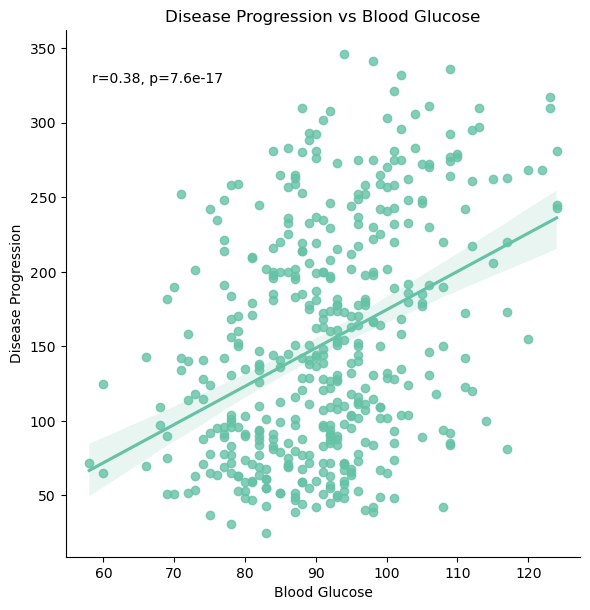

In [327]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['S6'], data['Y'])
    ax = plt.gca()
    ax.text(.05, 0.9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
g = sns.lmplot(x='S6', y='Y', data=df, height=6, aspect=1)
g.map_dataframe(annotate)
plt.title('Disease Progression vs Blood Glucose')
plt.xlabel('Blood Glucose')
plt.ylabel('Disease Progression')

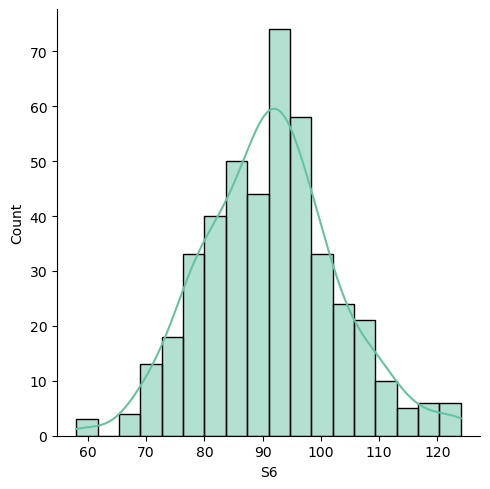

In [328]:
sns.displot(data=df,x='S6',kde=True)

In [329]:
def s6(col):
    if col <85:
        return '<85'
    elif col < 95:
        return '85-95'
    else:
        return '95+'
df['s6_band'] = np.vectorize(s6)(df['S6'])

In [330]:
df['s6_band'].value_counts()

95+      163
85-95    156
<85      123
Name: s6_band, dtype: int64

# Increasing median Disease Progression in Blood Glucose bins observed on Box Plot with Blood Glucose of 95+ at highest risk

<b>Blood Glucose Population Statistics:</b>

 - <85: Median Disease Progression of 96, 27.8% of our population with 32.5% of them above 140 in DP
 - 85-95: Median Disease Progression of 137.7, 35.3% of our population with 47.8% of them above 140 in DP
 - 95+: Median Disease Progression of 180, 36.9% of our population with 65.6% of them above 140 in DP

# ANOVA: Statistical difference observed in average Disease Progression between Blood Glucose Bins

- H₀ — There is no difference in the means of disease progression between Blood Glucose Groups
- H₁ — There is a difference in the means of disease progression between Blood Glucose Groups

P < 0.05 so we can reject the null hypothesis.  There is a statistical difference between groups and the Post-Hoc Test allowed us to identify the differences.

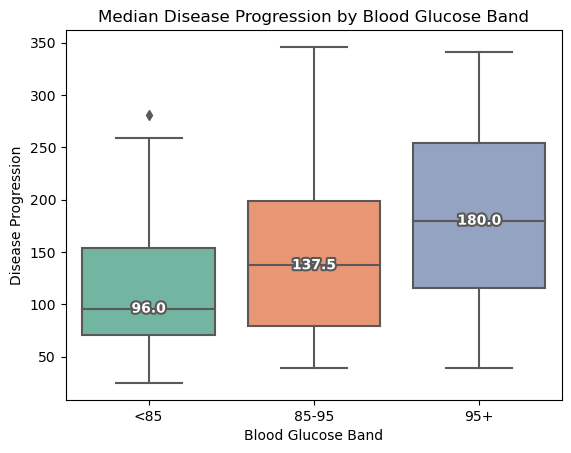

In [331]:
ax = sns.boxplot(x='s6_band',y='Y',data = df,order=["<85", "85-95","95+"])
add_median_labels(ax)
plt.title('Median Disease Progression by Blood Glucose Band')
plt.xlabel('Blood Glucose Band')
plt.ylabel('Disease Progression')
plt.show()

In [332]:
low_s6 = df.loc[df.s6_band == '<85']['Y']
med_s6 = df.loc[df.s6_band == '85-95']['Y']
high_s6 = df.loc[df.s6_band == '95+']['Y']

anova = stats.f_oneway(low_s6,med_s6,high_s6)

result = pairwise_tukeyhsd(endog = df['Y'], groups = df['s6_band'], alpha = 0.05)
print(result)
print(anova)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 85-95    95+  39.3676    0.0  20.3034  58.4319   True
 85-95    <85 -27.0888 0.0058  -47.613  -6.5646   True
   95+    <85 -66.4564    0.0 -86.7855 -46.1274   True
------------------------------------------------------
F_onewayResult(statistic=30.671932586867577, pvalue=3.400236027225299e-13)


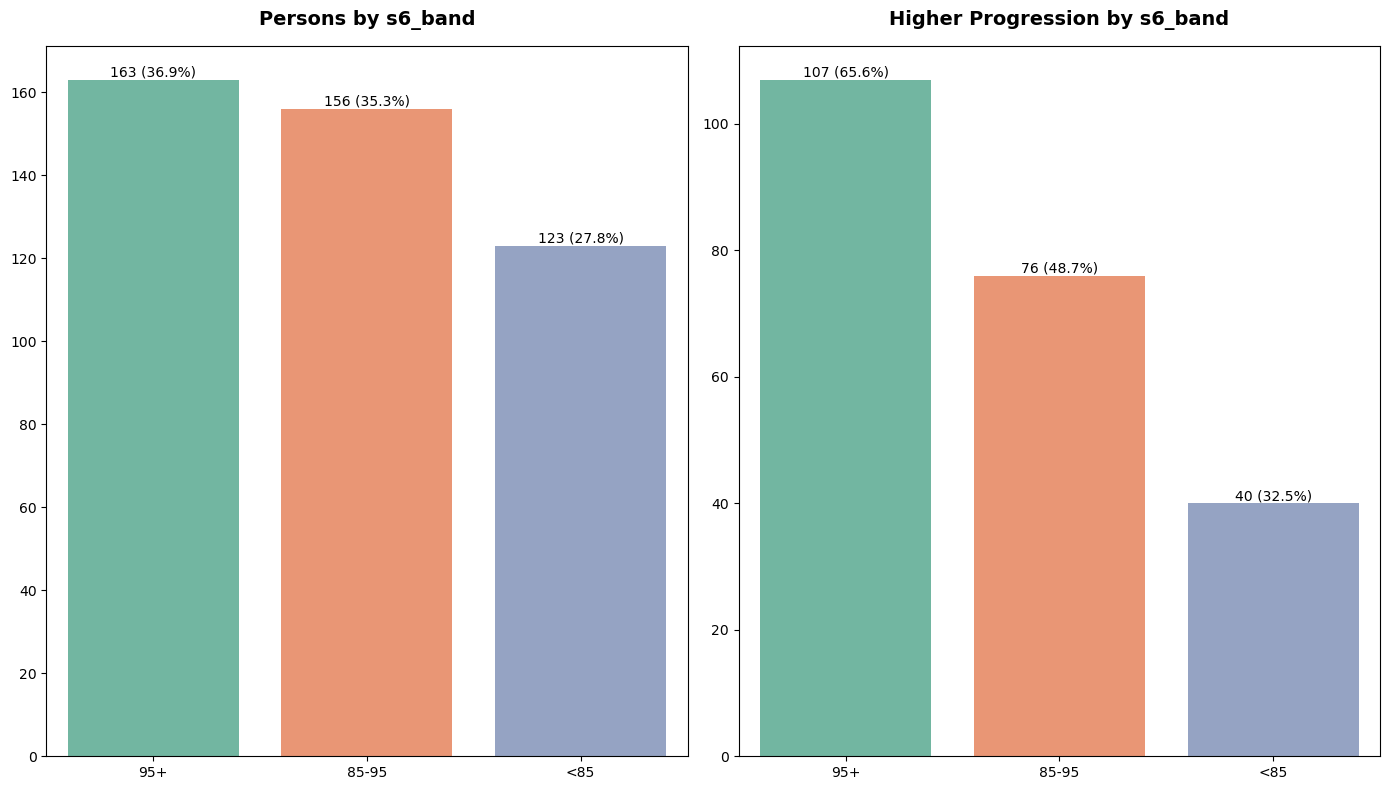

In [333]:
count_percent_plot(df, 's6_band', 'ind_disease')

# Step 3: Z-Score Method for Outliar Detection

<b>Disease Progression does not follow a normal distribution and positivly skewed:</b>

<b>Outliars:</b>

-  s1 - TC: total serum cholesterol: >= 300 inclusive of 2 datapoints
-  s2 - LDL: low-density lipoproteins: >= 215 inclusive of 2 datapoints
-  s3 - HDL: high-density lipoproteins: >= 91 inclusive of 4 datapoints
-  s4 - TCH: total cholesterol / HDL:  >= 8 inclusive of 4 datapoints

# Outliar Detection Based on Visualization

<b>Disease Progression does not follow a normal distribution and positivly skewed:</b>

<b>Outliars: Other Attributes may have an influence so data will not be dropped</b>

  - 1 - BMI > 30 and Disease Progression < 100: 8 datapoints: Average DP of this segment should be around 213
  - 2-  BMI < 23 and Disease Progression > 200: 4 datapoints: Average DP of this segment should be around 100
  - 3-  BP > 110 and Disease Progression < 100: 7 datapoints: Average DP of this segment should be around 194
  - 4-  BP < 90 and Disease Progression > 300:  4 datapoints: Average DP of this segment should be around 122


# Step 4: Dataset Limitations

 - Need to work with a professional in the medical field to understand outliars and whether or not data transformations will need to be made to ensure accurate modeling
 
 - Calculation of Disease Progression should be better understood in order to work on feature engineering
 
 - Alternative data sources with information on the persons Smoking Status, Genetic Risk Factors, Heart Disease Staus, and    Race, Ethnicity, and Geographic Living Status may help better explain varience in dataset and more confidently help with modeling

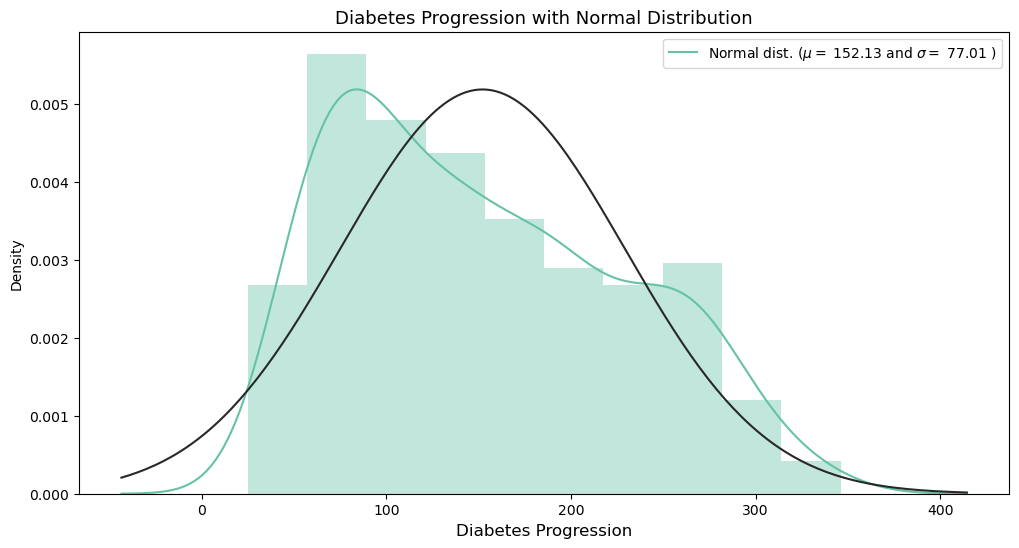

Skewness: 0.440563
Kurtosis: -0.883057
Shapiro_Test: 0.949058
Shapiro_Test: 0.000000


In [334]:
(mu, sigma) = norm.fit(df['Y'])
plt.figure(figsize = (12,6))
sns.distplot(df['Y'], kde = True, hist=True, fit = norm)
plt.title('Diabetes Progression with Normal Distribution', fontsize = 13)
plt.xlabel("Diabetes Progression", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

shap_t,shap_p = stats.shapiro(df['Y'])

print("Skewness: %f" % abs(df['Y']).skew())
print("Kurtosis: %f" % abs(df['Y']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

In [335]:
#outliers on individual columns
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            print(i)
    #return outliers

In [336]:
detect_outliers(df['Y'])

In [337]:
detect_outliers(df['BP'])

In [338]:
detect_outliers(df['S1'])

300
301


In [339]:
detect_outliers(df['S2'])

242.4
215.0


In [340]:
detect_outliers(df['S3'])

99.0
91.0
98.0
93.0
97.0


In [341]:
detect_outliers(df['S4'])

9.09
8.0
8.28
8.0


In [342]:
detect_outliers(df['S5'])

In [343]:
detect_outliers(df['S6'])

In [344]:
#outliars based on scatterplot observations

In [345]:
df.loc[(df.BMI>30) & (df.Y<100)]

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,...,Gender,Age_Band,bmi_band,bp_band,s5_band,s1_band,s2_band,s3_band,s4_band,s6_band
27,42,1,31.9,83.00,158,87.6,53.0,3.00,4.4659,101,...,Male,35-50,30+,<85,<4.5,<175,<100,50-60,<4,95+
56,37,1,30.2,87.00,166,96.0,40.0,4.15,5.0106,87,...,Male,35-50,30+,85-100,5+,<175,<100,<50,4-5,85-95
104,41,1,32.4,94.00,171,104.4,56.0,3.00,3.9703,76,...,Male,35-50,30+,85-100,<4.5,<175,100-125,50-60,<4,<85
205,40,1,30.7,99.00,177,85.4,50.0,4.00,5.3375,85,...,Male,35-50,30+,85-100,5+,175-200,<100,50-60,4-5,85-95
252,50,1,31.9,78.33,207,149.2,38.0,5.45,4.5951,84,...,Male,35-50,30+,<85,4.5-5,200+,125+,<50,5+,<85
289,28,2,31.5,83.00,228,149.4,38.0,6.00,5.3132,83,...,Female,18-35,30+,<85,5+,200+,125+,<50,5+,<85
328,38,1,32.6,77.00,168,100.6,47.0,4.00,4.6250,96,...,Male,35-50,30+,<85,4.5-5,<175,100-125,<50,4-5,95+
417,34,1,33.0,73.00,178,114.6,51.0,3.49,4.1271,92,...,Male,18-35,30+,<85,<4.5,175-200,100-125,50-60,<4,85-95


In [346]:
df.loc[(df.BMI<23) & (df.Y>200)]

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,...,Gender,Age_Band,bmi_band,bp_band,s5_band,s1_band,s2_band,s3_band,s4_band,s6_band
78,50,1,21.0,88.0,140,71.8,35.0,4.0,5.1120,71,...,Male,35-50,<25,85-100,5+,<175,<100,<50,4-5,<85
218,37,1,20.3,83.0,185,124.6,38.0,5.0,4.7185,88,...,Male,35-50,<25,<85,4.5-5,175-200,100-125,<50,5+,85-95
304,60,2,22.8,110.0,245,189.8,39.0,6.0,4.3944,88,...,Female,50-65,<25,100+,<4.5,200+,125+,<50,5+,85-95
365,58,1,22.8,91.0,196,118.8,48.0,4.0,4.9836,115,...,Male,50-65,<25,85-100,4.5-5,175-200,100-125,<50,4-5,95+


In [347]:
df.loc[(df.BP>110) & (df.Y<100)]

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,...,Gender,Age_Band,bmi_band,bp_band,s5_band,s1_band,s2_band,s3_band,s4_band,s6_band
7,66,2,26.2,114.00,255,185.0,56.0,4.55,4.2485,92,...,Female,65+,25-30,100+,<4.5,200+,125+,50-60,4-5,85-95
74,52,2,26.6,111.00,209,126.4,61.0,3.00,4.6821,109,...,Female,50-65,25-30,100+,4.5-5,200+,125+,60+,<4,95+
92,43,1,26.8,123.00,193,102.2,67.0,3.00,4.7791,94,...,Male,35-50,25-30,100+,4.5-5,175-200,100-125,60+,<4,85-95
153,60,2,22.3,113.00,186,125.8,46.0,4.00,4.2627,94,...,Female,50-65,<25,100+,<4.5,175-200,125+,<50,4-5,85-95
209,59,2,24.7,114.00,152,104.8,29.0,5.00,4.5109,88,...,Female,50-65,<25,100+,4.5-5,<175,100-125,<50,5+,85-95
337,54,2,25.2,115.00,181,120.0,39.0,5.00,4.7005,92,...,Female,50-65,25-30,100+,4.5-5,175-200,100-125,<50,5+,85-95
380,53,1,28.8,111.67,145,87.2,46.0,3.15,4.0775,85,...,Male,50-65,25-30,100+,<4.5,<175,<100,<50,<4,85-95


In [348]:
df.loc[(df.BP<90) & (df.Y>300)]

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,...,Gender,Age_Band,bmi_band,bp_band,s5_band,s1_band,s2_band,s3_band,s4_band,s6_band
9,29,1,30.0,85.0,180,93.4,43.0,4.0,5.3845,88,...,Male,18-35,30+,85-100,5+,175-200,<100,<50,4-5,85-95
141,41,1,30.8,81.0,214,152.0,28.0,7.6,5.1358,123,...,Male,35-50,30+,<85,5+,200+,125+,<50,5+,95+
256,35,1,41.3,81.0,168,102.8,37.0,5.0,4.9488,94,...,Male,18-35,30+,<85,4.5-5,<175,100-125,<50,5+,85-95
336,43,1,34.3,84.0,256,172.6,33.0,8.0,5.5294,104,...,Male,35-50,30+,<85,5+,200+,125+,<50,5+,95+


# Appendix - Machine Learning and Predictive Modeling

<b>OLS Regression results explain 0.52 of the variance in the data with statistical significance:</b>

<b>Base model features</b>

1. Gender, BMI, BP, S1, S2, and S5 are all statistically significant and will be used for modeling
  - Test Size for Modeling - 30% of the data will be used for testing and the rest for training

<b>Top performing Model</b>

1. Gradient Boosting Regressor produced the best results with where MAE : 0.296, MSE : 0.15 RMSE : 0.38 in log terms, using RMSE for standard error metric, this results in ~9% error rate compared to the average disease progression of the entire dataset

In [349]:
X = df.drop(['Y','Age_Band','bmi_band','bp_band','s5_band','s4_band','s3_band','s6_band','s3_band','s1_band','s2_band','ind_disease','Gender'],axis = 1)

y =  np.log(df['Y'])


In [350]:
y.mean()

4.881322924164248

In [351]:
X_sm = sm.add_constant(X)

In [352]:
lr = sm.OLS(y, X_sm).fit()

In [353]:
lr

In [354]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     40.46
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           5.84e-56
Time:                        14:41:38   Log-Likelihood:                -222.99
No. Observations:                 442   AIC:                             468.0
Df Residuals:                     431   BIC:                             513.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4897      0.505      2.947      0.0

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [356]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [357]:
def run_model(model,scaled_X_train,y_train,scaled_X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    MAE = mean_absolute_error(y_test,preds)
    MSE = mean_squared_error(y_test,preds)
    RMSE = np.sqrt(mean_squared_error(y_test,preds))
    
    test_res = y_test - preds
    
    sns.displot(test_res,bins=25,kde=True)
    
    fig, ax = plt.subplots(figsize=(6,8),dpi=100)
    _ = sp.stats.probplot(test_res,plot=ax)
    
    
    
    print(f'MAE : {MAE}')
    print(f'MSE : {MSE}')
    print(f'RMSE : {RMSE}')

MAE : 0.3085381515121172
MSE : 0.15779333405666549
RMSE : 0.39723209091998785


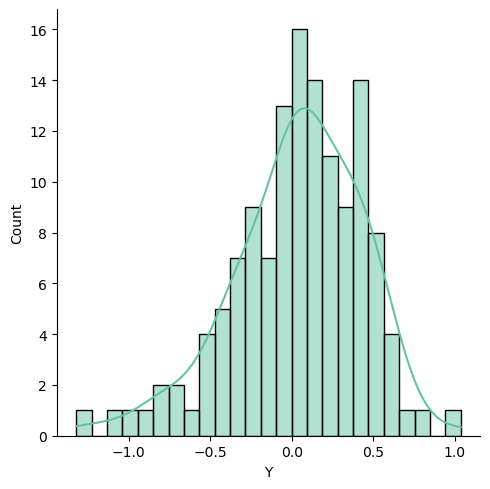

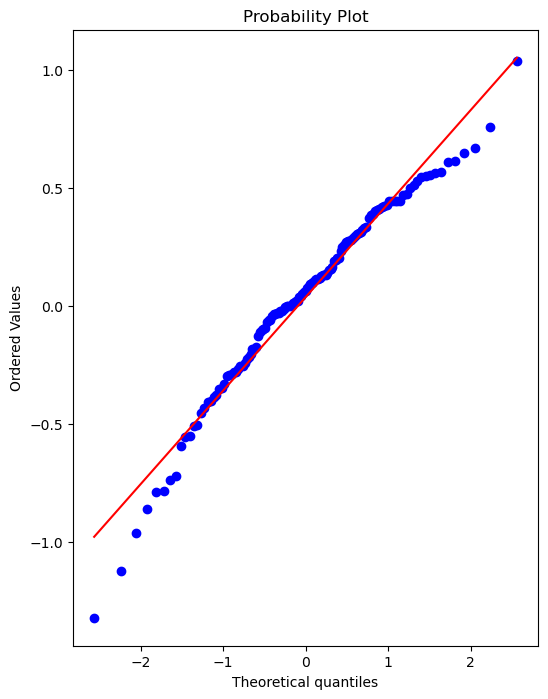

In [358]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

MAE : 0.30689749094367025
MSE : 0.15585713844637328
RMSE : 0.3947874598393081


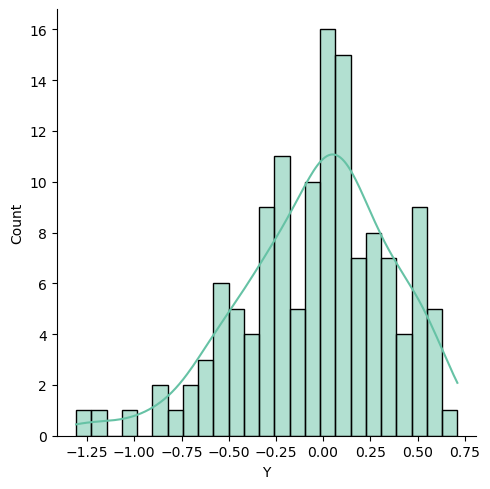

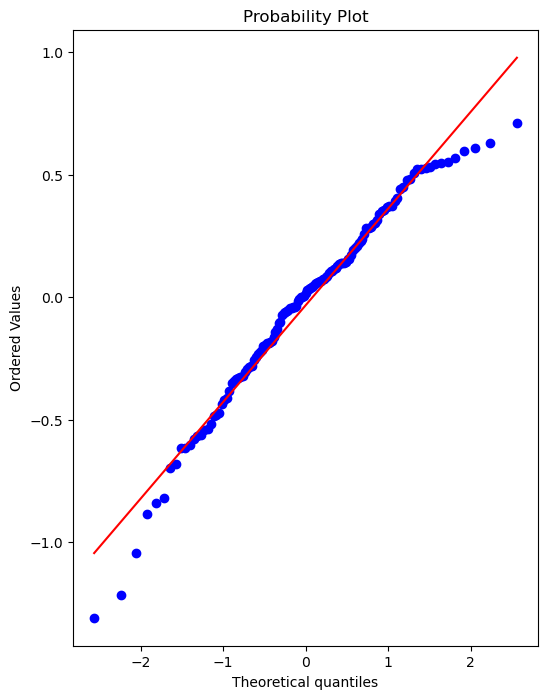

In [359]:

param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

grid = GridSearchCV(svr,param_grid)

run_model(grid,X_train,y_train,X_test,y_test)

In [360]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

MAE : 0.3142446935205162
MSE : 0.15359055687136766
RMSE : 0.391906311344137


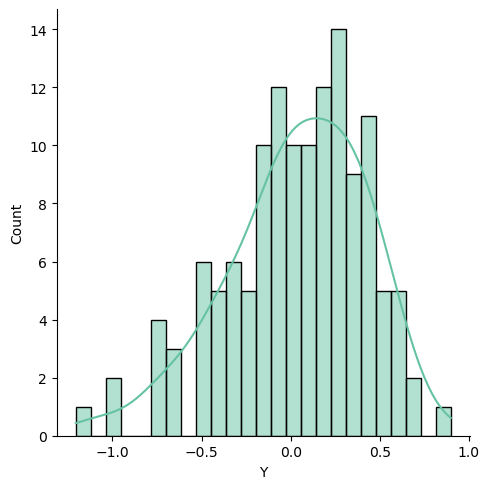

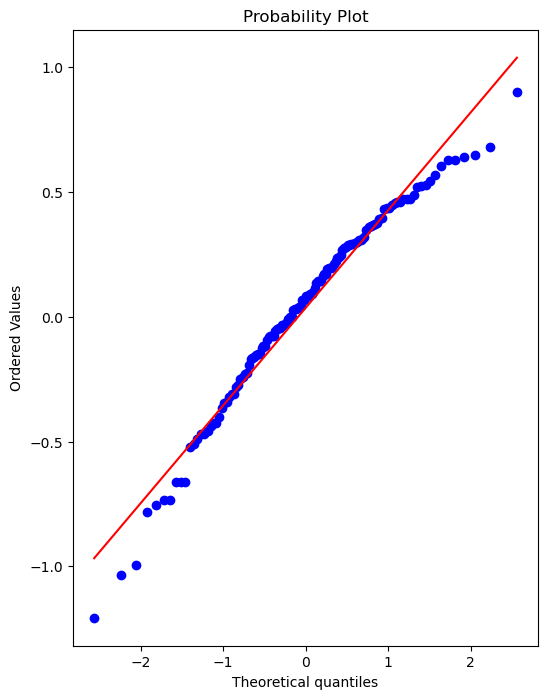

In [361]:
run_model(lasso_cv_model,X_train,y_train,X_test,y_test)

In [362]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

MAE : 0.3086793105150357
MSE : 0.157742939778928
RMSE : 0.39716865407396895


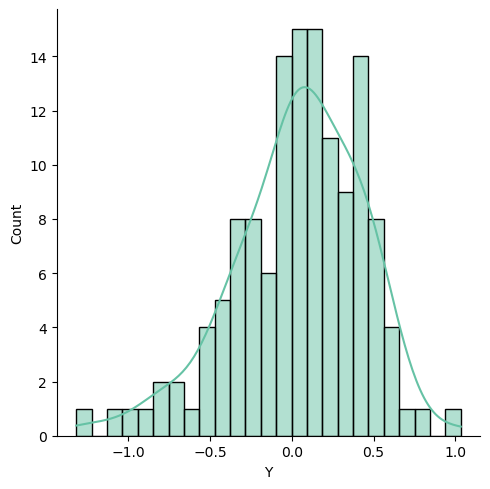

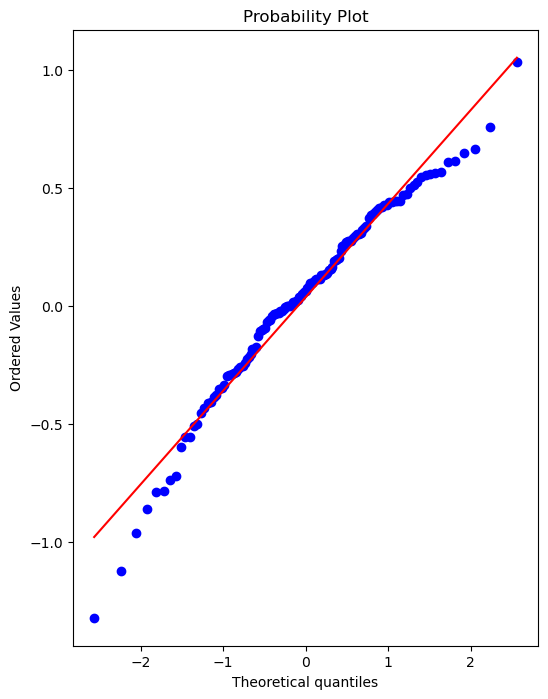

In [363]:
run_model(ridge_cv_model,X_train,y_train,X_test,y_test)

In [364]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01,max_iter=100000)

MAE : 0.30982280500815235
MSE : 0.15729501501012835
RMSE : 0.3966043557629295


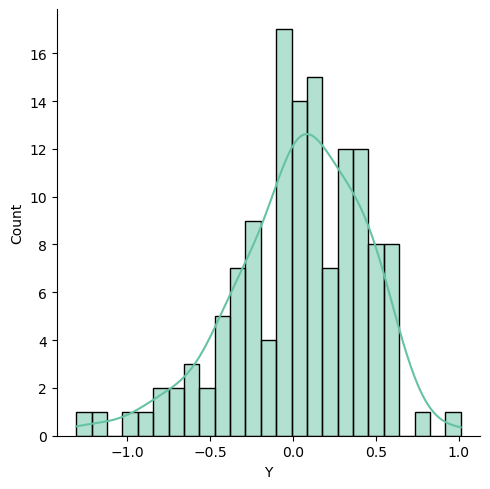

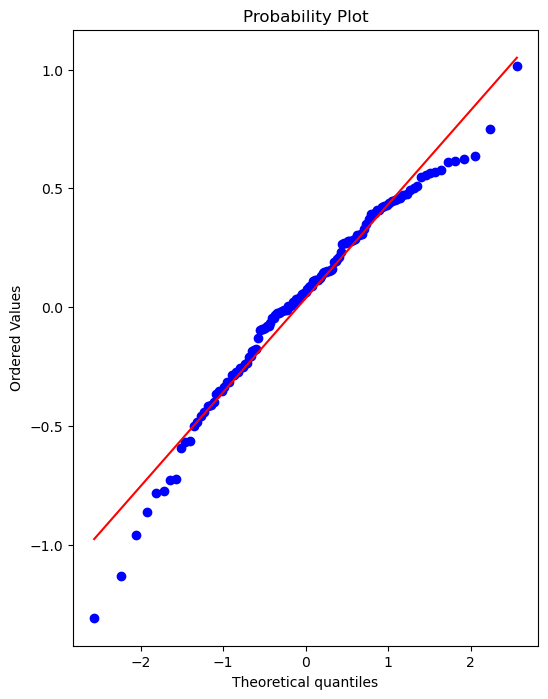

In [365]:
run_model(elastic_model,X_train,y_train,X_test,y_test)

In [366]:
df['Y'].mean()

152.13348416289594

In [367]:
RFR = RandomForestRegressor(random_state=13)

In [368]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [369]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

MAE : 0.32161372488509715
MSE : 0.16520713720468425
RMSE : 0.40645680853527877


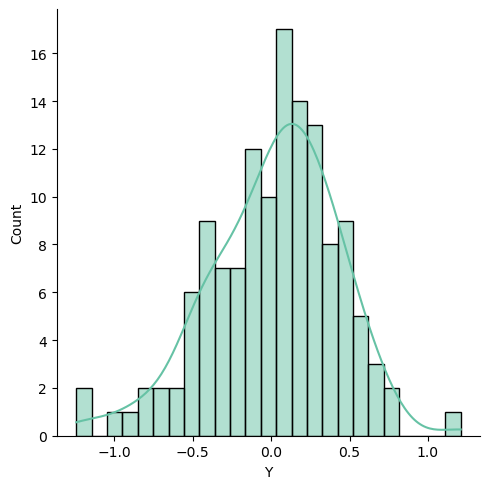

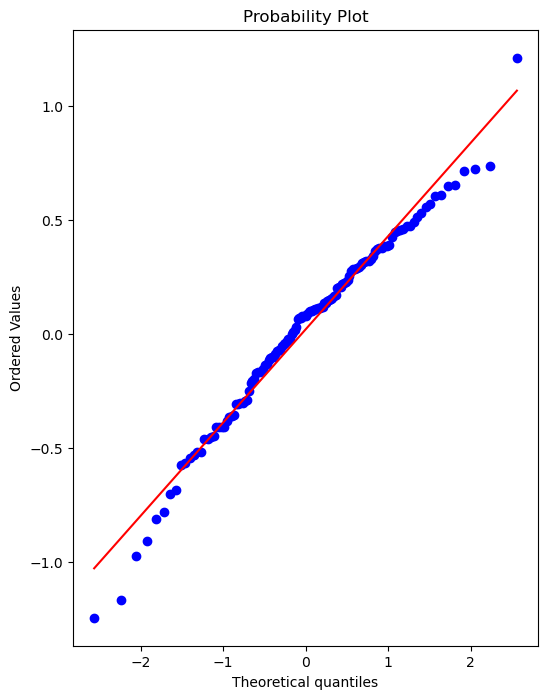

In [370]:
run_model(rfr_cv,X_train,y_train,X_test,y_test)

In [371]:
XGB = XGBRegressor(random_state=13)

In [372]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [373]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

MAE : 0.3101804823327798
MSE : 0.16466595924240546
RMSE : 0.4057905361666354


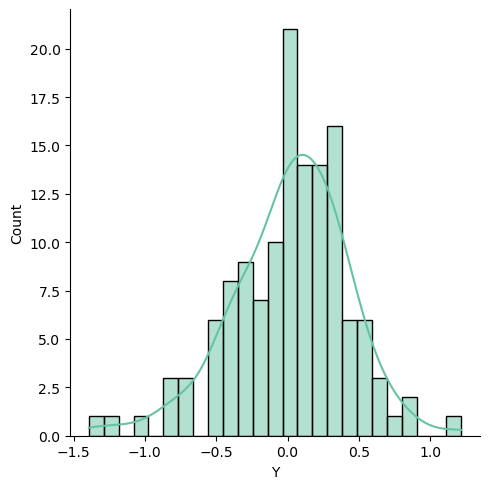

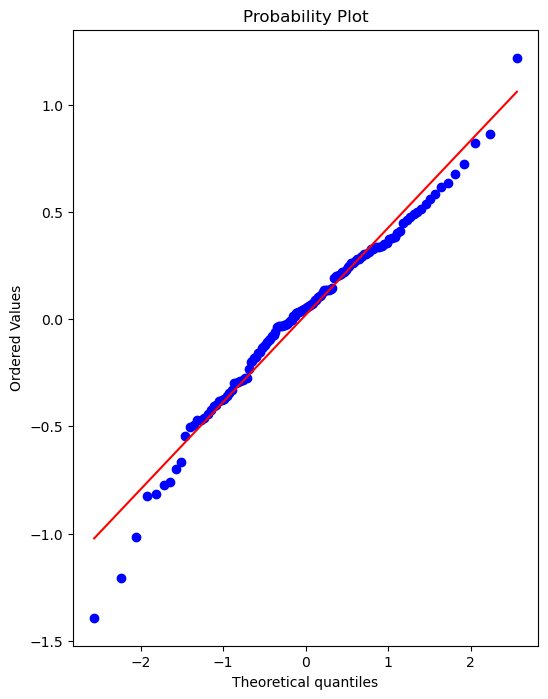

In [374]:
run_model(xgb_cv ,X_train,y_train,X_test,y_test)

In [375]:
GBR = GradientBoostingRegressor()

In [376]:
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

In [377]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

MAE : 0.29824203636457514
MSE : 0.15405634318785313
RMSE : 0.39250011871062296


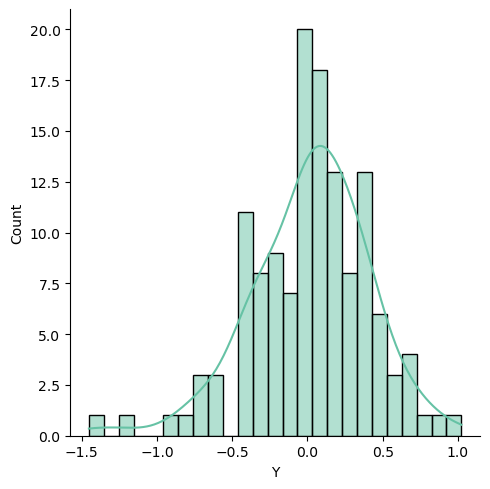

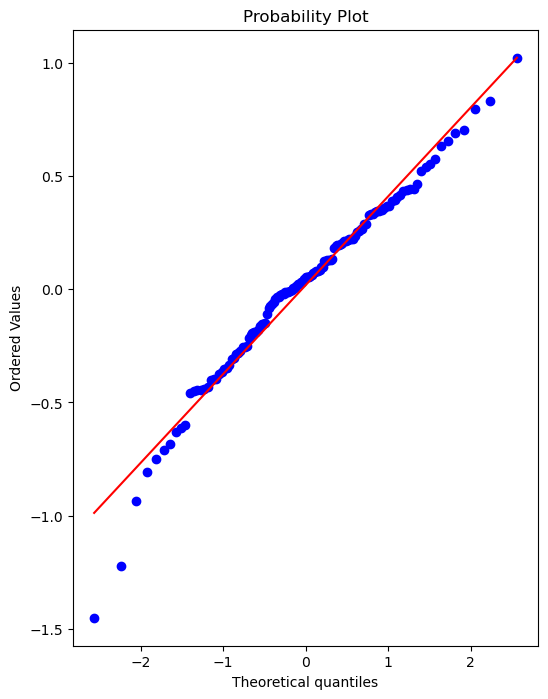

In [378]:
run_model(GBR_cv ,X_train,y_train,X_test,y_test)

In [379]:
lgbm_regressor = lgb.LGBMRegressor()

In [380]:
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [381]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 309, number of used features: 10
[LightGBM] [Info] Start training from score 4.888934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

MAE : 0.31242528430058325
MSE : 0.1640718764716362
RMSE : 0.4050578680529934


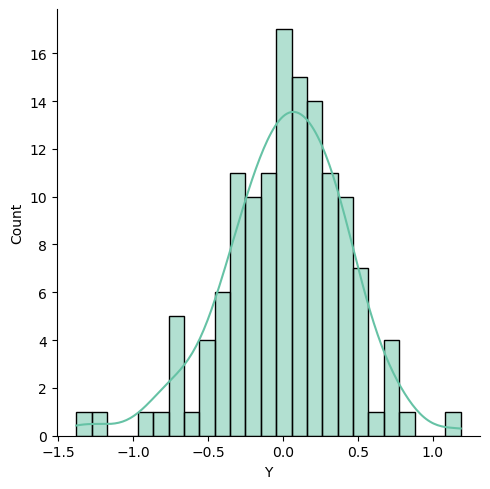

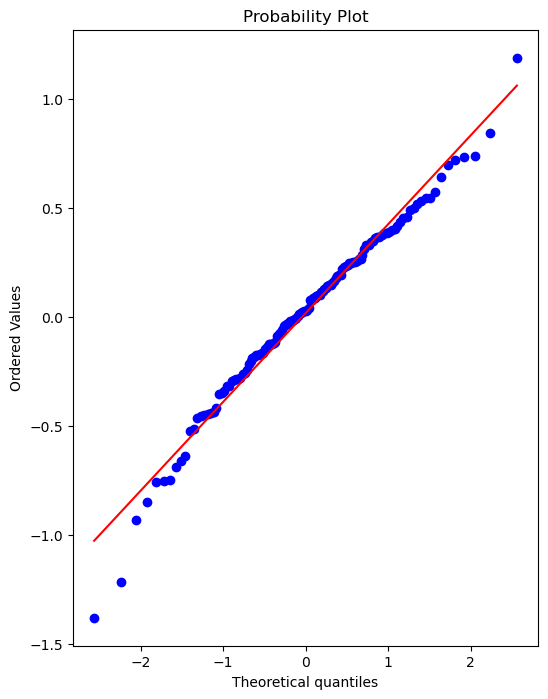

In [382]:
run_model(lgbm_cv ,X_train,y_train,X_test,y_test)